# First Steps

Loading and inspecting the data

Renaming messy columns

Dropping irrelevant or noisy columns

Selecting predictive features

Preparing the target variable

Final cleanup and export

In [1]:
#Loading and inspecting the data

import pandas as pd
import pandas as pd

df = pd.read_csv ("2017.csv")
print(df.shape)
print (df.columns)


(756, 123)
Index(['#', '<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       ...
       'What is your gender?', 'What country do you <strong>live</strong> in?',
       'What US

In [2]:
print(df.columns.tolist())



['#', '<strong>Are you self-employed?</strong>', 'How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Does your employer provide mental health benefits\xa0as part of healthcare coverage?', 'Do you know the options for mental health care available under your employer-provided health coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 'Would you feel more comfortable talking

In [3]:
#Rename messy columns

col_renames = {
    # Employment & Role
    '*Are you self-employed?*': 'self_employed',
    '<strong>Are you self-employed?</strong>': 'self_employed',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Is your primary role within your company related to tech/IT?': 'tech_related_role',
    'How many employees does your company or organization have?': 'company_size',
    '<strong>Do you have previous employers?</strong>': 'has_previous_employers',
    'Was your employer primarily a tech company/organization?': 'prev_employer_tech',
    '<strong>Have your previous employers provided mental health benefits?</strong>': 'prev_employer_benefits',
    '<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>': 'prev_employer_mh_awareness',

    # Benefits & Resources
    'Does your employer provide mental health benefits\xa0as part of healthcare coverage?': 'benefits',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Does your employer provide mental health benefits as part of healthcare coverage?\t': 'benefits',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'benefits_awareness',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'formal_mh_discussion',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'workplace_resources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity_protected',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'prev_formal_mh_discussion',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 'prev_workplace_resources',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'prev_anonymity_protected',

    # Communication & Comfort
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'comfortable_with_supervisor',
    'Would you feel comfortable discussing a mental health issue with your coworkers?': 'comfortable_with_coworkers',
    'Have you ever discussed your mental health with your employer?': 'mh_employer_discussion',
    'Have you ever discussed your mental health with coworkers?': 'mh_coworker_discussion',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?': 'coworker_comfort_comparison',
    'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?': 'prev_comfort_comparison',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?': 'prev_comfort_with_supervisor',
    'Did you ever discuss your mental health with your previous employer?': 'prev_mh_employer_discussion',
    '<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>': 'prev_comfort_with_coworkers',
    'Did you ever discuss your mental health with a previous coworker(s)?': 'prev_mh_coworker_discussion',

    # Coverage & Access
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'medical_coverage',
    'Do you know local or online resources to seek help for a mental health issue?': 'resource_awareness',

    # Mental Health Status & History
    'Do you currently have a mental health disorder?': 'mental_health',
    'Do you *currently* have a mental health disorder?': 'mental_health',
    'Have you ever been diagnosed with a mental health disorder?': 'mh_diagnosed',
    'Have you had a mental health disorder in the past?': 'mh_history',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'mh_treatment',
    'Do you have a family history of mental illness?': 'family_history',

    # Disorders (first instance only)
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'disorder_anxiety',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'disorder_mood',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 'disorder_psychotic',
    'Eating Disorder (Anorexia, Bulimia, etc)': 'disorder_eating',
    'Attention Deficit Hyperactivity Disorder': 'disorder_adhd',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 'disorder_personality',
    'Obsessive-Compulsive Disorder': 'disorder_ocd',
    'Post-Traumatic Stress Disorder': 'disorder_ptsd',
    'Stress Response Syndromes': 'disorder_stress',
    'Dissociative Disorder': 'disorder_dissociative',
    'Substance Use Disorder': 'disorder_substance',
    'Addictive Disorder': 'disorder_addictive',
    'Other': 'disorder_other',

    # Impact & Identification
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>': 'mh_work_impact_treated',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>': 'mh_work_impact_untreated',
    'Do you believe your productivity is ever affected by a mental health issue?': 'mh_productivity_impact',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'mh_productivity_percent',
    'Are you openly identified at work as a person with a mental health issue?': 'identified_at_work',
    'Has being identified as a person with a mental health issue affected your career?': 'identification_career_impact',

    # Perception & Disclosure
    '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>': 'disclose_to_clients',
    '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>': 'disclose_to_coworkers',
    'If they knew you suffered from a mental health disorder,\xa0how do you think that team members/co-workers would react?': 'coworker_reaction_expectation',
    '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>': 'observed_unsupportive_response',
    '<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>': 'observed_supportive_response',

    # Industry Perception
    'Overall, how well do you think the tech industry supports employees with mental health issues?': 'industry_support_rating',

    # Interview Willingness
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'interview_physical_health_disclosure',
    'Would you bring up your mental health with a potential employer in an interview?': 'interview_mental_health_disclosure',
    'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em>\xa0and only with your permission.)': 'interview_opt_in',

    
    # Sharing & Stigma
    'How willing would you be to share with friends and family that you have a mental illness?': 'mh_share',

    # Demographics
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you *live* in?': 'country',
    'What country do you <strong>live</strong> in?': 'country',
    'What US state or territory do you <strong>live</strong> in?': 'us_state_live',
    'What is your race?': 'race',
    'Other.3': 'race_other',
    'What country do you <strong>work</strong> in?': 'country_work',
    'What US state or territory do you <strong>work</strong> in?': 'us_state_work',

    # Metadata
    '#': 'response_id',
    'Start Date (UTC)': 'start_date',
    'Submit Date (UTC)': 'submit_date',
    'Network ID': 'network_id',
}

df.rename(columns=col_renames, inplace=True)



In [4]:
import pandas as pd

# ✅ Define gender aliases
male_aliases = [
    'male', 'M', 'm', 'Male', 'Man', 'cis male', 'Cis-male', 'Cis Male', 'dude',
    'Ostensibly Male', 'male, born with xy chromosoms', 'Malel', 'MALE', 'SWM',
    'Cisgender male', 'man', 'Cis male',
    "male (hey this is the tech industry you're talking about)",
    "Male (cis)", "Male, cis", 'cis hetero male', 'Mail', 'cis-male',
    'cis male', 'Male-ish', 'God King of the Valajar', 'cis male ', 'male/androgynous ', 'Male '
]

female_aliases = [
    'female', 'F', 'f', 'Female', 'Woman', 'woman', 'I identify as female',
    "*shrug emoji* (F)", 'Cis female', 'Cis woman', 'Female (cisgender)',
    'Cis-Female', 'Cisgendered woman', 'cisgender female', 'cis-Female',
    'My sex is female.', 'female (cis)', 'femail', 'femalw', 'Female-ish',
    "F, cisgender", 'Woman-identified', 'Female (cis)', 'female (cisgender)',
    'cis female', 'Female (cis) ', 'Female '
]

trans_nb_aliases = [
    'Nonbinary', 'Trans man', 'transgender', 'Nonbinary/femme', 'non binary',
    'Female/gender non-binary.', 'Trans female', 'non-binary',
    'She/her/they/them', 'NB', 'Transfeminine', 'Non-binary', 'trans woman',
    'nonbinary', 'Non binary', 'Trans woman'
]

other_aliases = [
    'Genderqueer', 'Genderfluid', 'Agender', 'Other', "Male (or female, or both)",
    'genderfluid', 'None', 'none', 'uhhhhhhhhh fem genderqueer?',
    'Genderqueer demigirl', 'Genderqueer/non-binary', 'Agender/genderfluid',
    'Contextual', 'sometimes', 'gender non-conforming woman', 'Demiguy',
    'male/androgynous', r'\-', 'Unknown'
]

# ✅ Normalize gender column
df['gender'] = df['gender'].replace(male_aliases, 'Male')
df['gender'] = df['gender'].replace(female_aliases, 'Female')
df['gender'] = df['gender'].replace(trans_nb_aliases, 'Trans/Non-binary')
df['gender'] = df['gender'].replace(other_aliases, 'Other')


In [5]:
df['interview_opt_in'] = df['interview_opt_in'].fillna('Unknown')


In [6]:
print(df.columns.tolist())

['response_id', 'self_employed', 'company_size', 'tech_company', 'tech_related_role', 'benefits', 'benefits_awareness', 'formal_mh_discussion', 'workplace_resources', 'anonymity_protected', 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 'coworker_comfort_comparison', 'comfortable_with_supervisor', 'mh_employer_discussion', 'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.', 'comfortable_with_coworkers', 'mh_coworker_discussion', 'Describe the conversation with coworkers you had about your mental health including their reactions.', "Have you ever had a coworker discuss their or another coworker's mental health with you?", 'Describe the conversation your coworker had with you about their mental health (please do not use names).', 'Overall, how much importance does your em

In [7]:
df.dtypes.tolist

<bound method IndexOpsMixin.tolist of response_id           object
self_employed          int64
company_size          object
tech_company         float64
tech_related_role    float64
                      ...   
country_work          object
us_state_work         object
start_date            object
submit_date           object
network_id            object
Length: 123, dtype: object>

# Dropping irrelevant columns

Free-text responses (hard to model without NLP)
Metadata (like timestamps or IDs)
Duplicates or repeated disorder indicators
Subjective or speculative (e.g. “How do you think coworkers would react?”)

In [8]:
#Drop irrelevant columns:
columns_to_drop = [
    # Free-text responses
    'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.',
    'Describe the conversation with coworkers you had about your mental health including their reactions.',
    "Describe the conversation your coworker had with you about their mental health (please do not use names).",
    'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.',
    'Describe the conversation you had with your previous coworkers about your mental health including their reactions.',
    "Describe the conversation your coworker had with you about their mental health (please do not use names)..1",
    'Describe the circumstances of the badly handled or unsupportive response.',
    'Describe the circumstances of the supportive or well handled response.',
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
    'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.',
    'Why or why not?',
    'Why or why not?.1',
    'How has it affected your career?',

    # Metadata
    'response_id', 'start_date', 'submit_date', 'network_id',

    # Duplicate disorder columns (.1, .2, etc.)
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1',
    'Eating Disorder (Anorexia, Bulimia, etc).1',
    'Attention Deficit Hyperactivity Disorder.1',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
    'Obsessive-Compulsive Disorder.1',
    'Post-traumatic Stress Disorder',
    'Stress Response Syndromes.1',
    'Dissociative Disorder.1',
    'Substance Use Disorder.1',
    'Addictive Disorder.1',
    'Other.1',
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2',
    'Eating Disorder (Anorexia, Bulimia, etc).2',
    'Attention Deficit Hyperactivity Disorder.2',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2',
    'Obsessive-Compulsive Disorder.2',
    'Post-traumatic Stress Disorder.1',
    'Stress Response Syndromes.2',
    'Dissociative Disorder.2',
    'Substance Use Disorder.2',
    'Addictive Disorder.2',
    'Other.2',
]

# Drop them from your DataFrame
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)


In [9]:
#Dropping mh_productivity_percent reflects how much of a person's work time is affected by mental health issues. It's self-reported, categorical, and ranges like '1-25%', '26-50%', etc
#Subjective, 671 missing values
df.drop(columns=['mh_productivity_percent'], inplace=True)


In [10]:
df.shape

(756, 79)

In [11]:
# See how many nulls are in each column
df.isnull().sum().sort_values(ascending=False)

disorder_eating             756
disorder_ptsd               756
disorder_adhd               756
disorder_other              756
disorder_addictive          756
                           ... 
mh_work_impact_untreated      0
mh_work_impact_treated        0
family_history                0
mh_treatment                  0
self_employed                 0
Length: 79, dtype: int64

In [12]:
#Low Null Count (under 20)
df['age'] = df['age'].fillna(df['age'].median())
df['country'] = df['country'].fillna('Unknown')
df['gender'] = df['gender'].fillna('Unknown')
df['mh_history'] = df['mh_history'].fillna('Unknown')


In [13]:
#Moderate Null Count (100–300)
moderate_nulls = [
    'race',
    'benefits_awareness',
    'comfortable_with_coworkers',
    'comfortable_with_supervisor',
    'mh_coworker_discussion',
    'mh_employer_discussion',
    'anonymity_protected',
    'formal_mh_discussion',
    'workplace_resources',
    'benefits'
]

# Fill all moderate nulls with 'Unknown'
df[moderate_nulls] = df[moderate_nulls].fillna('Unknown')


In [14]:
#High Null count
#Fill disorder_* columns with 0
# These are binary indicators (yes/no), so missing likely means “not reported” we assume 0.

# Identify all disorder columns
disorder_cols = [col for col in df.columns if col.startswith('disorder_')]

# Fill missing values with 0
df[disorder_cols] = df[disorder_cols].fillna(0)

#Other categorical and numerical high Null columns
df['mh_diagnosed'] = df['mh_diagnosed'].fillna('Unknown')
df['resource_awareness'] = df['resource_awareness'].fillna('Unknown')
df['medical_coverage'] = df['medical_coverage'].fillna('Unknown')
df['mh_productivity_impact'] = df['mh_productivity_impact'].fillna('Unknown')


In [15]:
for col in df.columns:
    if "Would you be willing to talk to one of us more extensively" in col:
        print(repr(col))


In [16]:
df['interview_opt_in'] = df['interview_opt_in'].fillna('Unknown')


In [17]:
# Step 1: Calculate null percentage for each column
null_percent = df.isnull().mean()

# Step 2: Identify columns with more than 80% nulls
cols_to_drop = null_percent[null_percent > 0.80].index.tolist()
print(cols_to_drop)


['disclose_to_clients', 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?', 'disclose_to_coworkers', 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?', 'identification_career_impact', 'race_other']


In [18]:
# Step 3: Drop those columns
df.drop(columns=cols_to_drop, inplace=True)

# Step 4: Confirm cleanup
print(f"Dropped {len(cols_to_drop)} columns with >80% nulls.")
print("Remaining columns:", df.shape[1])


Dropped 6 columns with >80% nulls.
Remaining columns: 73


In [19]:
print("Total remaining null values:", df.isnull().sum().sum())


Total remaining null values: 2846


In [20]:
#Fill location-based columns with 'Unknown'
df['us_state_live'] = df['us_state_live'].fillna('Unknown')
df['us_state_work'] = df['us_state_work'].fillna('Unknown')
df['country_work'] = df['country_work'].fillna('Unknown')

#Fill workplace perception & role columns with 'Unknown'
cols_to_fill_unknown = [
    'tech_company', 'tech_related_role', 'company_size',
    'coworker_comfort_comparison',
    'Overall, how much importance does your employer place on mental health?',
    'Overall, how much importance does your employer place on physical health?',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
    'Did you ever have a previous coworker discuss their or another coworker\'s mental health with you?',
    'prev_mh_coworker_discussion', 'prev_workplace_resources', 'prev_employer_tech',
    'prev_employer_benefits', 'prev_anonymity_protected',
    'Overall, how much importance did your previous employer place on mental health?',
    'Overall, how much importance did your previous employer place on physical health?',
    'prev_employer_mh_awareness', 'prev_comfort_with_coworkers',
    'prev_formal_mh_discussion', 'prev_comfort_with_supervisor',
    'prev_comfort_comparison', 'prev_mh_employer_discussion'
]

df[cols_to_fill_unknown] = df[cols_to_fill_unknown].fillna('Unknown')

#Fill behavioral and perception columns with 'Unknown'

df['Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?'] = df[
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?'
].fillna('Unknown')

df['Have you ever had a coworker discuss their or another coworker\'s mental health with you?'] = df[
    'Have you ever had a coworker discuss their or another coworker\'s mental health with you?'
].fillna('Unknown')

df['identified_at_work'] = df['identified_at_work'].fillna('Unknown')
df['coworker_reaction_expectation'] = df['coworker_reaction_expectation'].fillna('Unknown')
df['observed_unsupportive_response'] = df['observed_unsupportive_response'].fillna('Unknown')
df['observed_supportive_response'] = df['observed_supportive_response'].fillna('Unknown')
df['industry_support_rating'] = df['industry_support_rating'].fillna('Unknown')

#Final Check
print("Total remaining null values:", df.isnull().sum().sum())



Total remaining null values: 0


In [21]:
column_list = df.columns.tolist()
print(column_list)


['self_employed', 'company_size', 'tech_company', 'tech_related_role', 'benefits', 'benefits_awareness', 'formal_mh_discussion', 'workplace_resources', 'anonymity_protected', 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 'coworker_comfort_comparison', 'comfortable_with_supervisor', 'mh_employer_discussion', 'comfortable_with_coworkers', 'mh_coworker_discussion', "Have you ever had a coworker discuss their or another coworker's mental health with you?", 'Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?', 'medical_coverage', 'resource_awareness', 'mh_productivity_impact', 'has_previous_employers', 'prev_employer_tech', 'prev_employer_benefits', 'prev_employer_mh_awareness', 'prev_formal_mh_discussion', 'prev_workplace_resources', 'prev_anonymity_protected', 'prev_comfort_comparison', 'prev_comfort_wit

In [22]:
df['mental_health'].unique()

array(['Possibly', 'Yes', 'No', "Don't Know"], dtype=object)

In [23]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n🔹 {col} — {len(unique_vals)} unique values")
    print(unique_vals)



🔹 self_employed — 2 unique values
[0 1]

🔹 company_size — 7 unique values
['100-500' '6-25' 'More than 1000' 'Unknown' '26-100' '1-5' '500-1000']

🔹 tech_company — 3 unique values
[1.0 'Unknown' 0.0]

🔹 tech_related_role — 3 unique values
[1.0 'Unknown' 0.0]

🔹 benefits — 5 unique values
['No' 'Yes' "I don't know" 'Unknown' 'Not eligible for coverage / NA']

🔹 benefits_awareness — 3 unique values
['Yes' 'No' 'Unknown']

🔹 formal_mh_discussion — 4 unique values
['No' "I don't know" 'Unknown' 'Yes']

🔹 workplace_resources — 4 unique values
["I don't know" 'No' 'Unknown' 'Yes']

🔹 anonymity_protected — 4 unique values
["I don't know" 'Yes' 'Unknown' 'No']

🔹 If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? — 7 unique values
["I don't know" 'Difficult' 'Unknown' 'Somewhat easy' 'Very easy'
 'Neither easy nor difficult' 'Somewhat difficult']

🔹 coworker_comfort_comparison — 4 unique values
['Same level of c

In [24]:
# Choose a clear, stable order for reporting
label_order = ['No', "Don't Know", 'Possibly', 'Yes']
label2id = {label: i for i, label in enumerate(label_order)}
id2label = {v: k for k, v in label2id.items()}

# Encode target
df['mental_health_enc'] = df['mental_health'].map(label2id)
assert not df['mental_health_enc'].isna().any(), "Unseen label found in mental_health"

y = df['mental_health_enc']
X = df.drop(columns=['mental_health', 'mental_health_enc']).copy()

# Univariate Analysis

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/3888204033.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mental_health', order=label_order, palette='Blues')


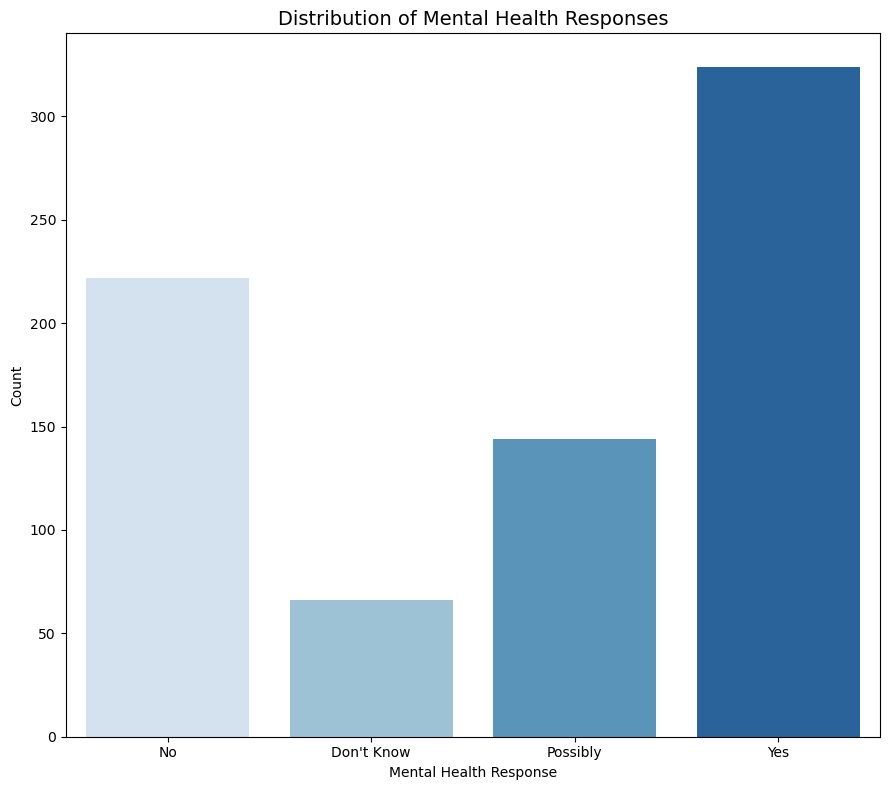

In [25]:
# Target variable

import matplotlib.pyplot as plt
import seaborn as sns

# Define custom order
label_order = ['No', "Don't Know", 'Possibly', 'Yes']

plt.figure(figsize=(9, 8))
sns.countplot(data=df, x='mental_health', order=label_order, palette='Blues')

plt.title('Distribution of Mental Health Responses', fontsize=14)
plt.xlabel('Mental Health Response')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/1223527243.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='mental_health', order=label_order, palette='Blues')


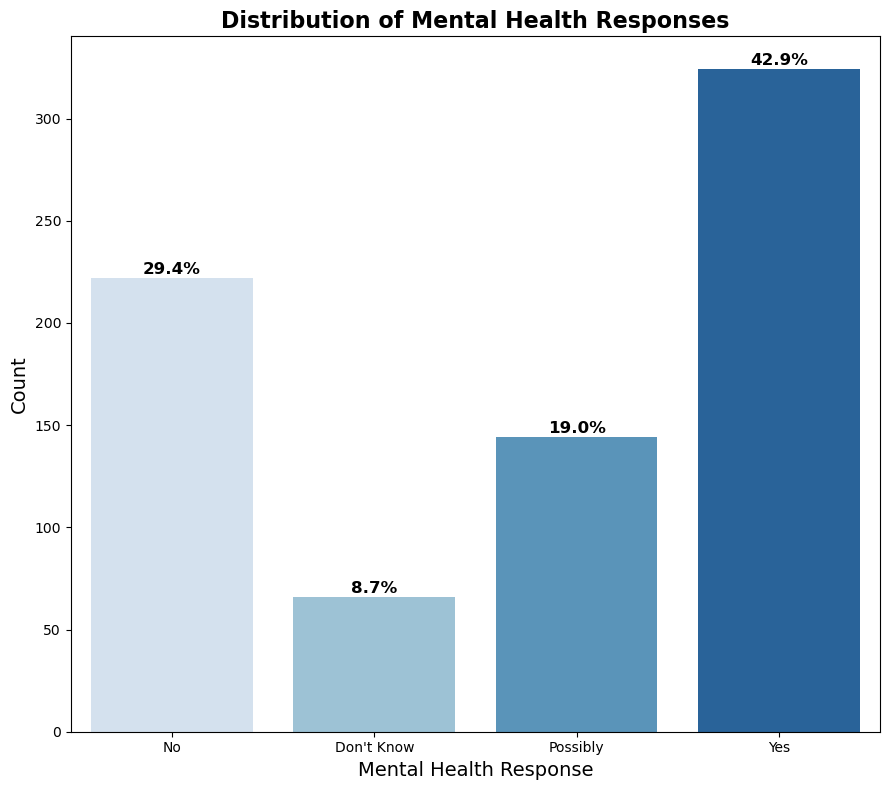

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom order
label_order = ['No', "Don't Know", 'Possibly', 'Yes']

# Calculate percentage distribution
total = len(df)
percentages = df['mental_health'].value_counts(normalize=True).reindex(label_order) * 100

plt.figure(figsize=(9, 8))
ax = sns.countplot(data=df, x='mental_health', order=label_order, palette='Blues')

# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percent = percentages[label_order[i]]
    ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{percent:.1f}%', 
            ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Distribution of Mental Health Responses', fontsize=16, fontweight='bold')
plt.xlabel('Mental Health Response', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


In [27]:
print(df['mh_history'].unique())


['Possibly' 'Yes' 'No' 'Unknown' "Don't Know"]


/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/1891708174.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='mh_history', order=label_order, palette='Purples')


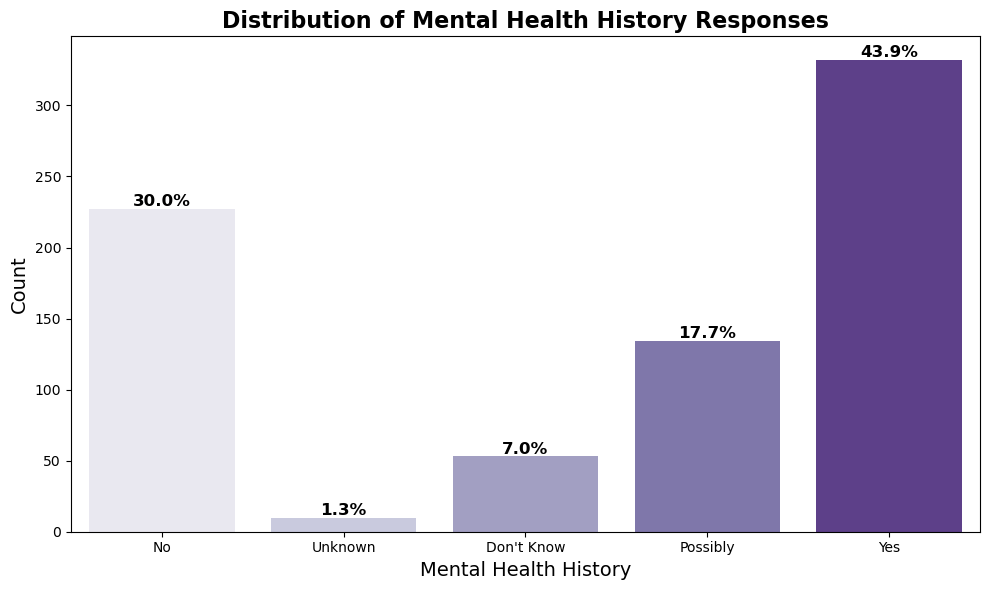

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom order based on actual data
label_order = ['No', 'Unknown', "Don't Know", 'Possibly', 'Yes']

# Calculate percentage distribution
total = len(df)
percentages = df['mh_history'].value_counts(normalize=True).reindex(label_order) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='mh_history', order=label_order, palette='Purples')

# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percent = percentages[label_order[i]]
    ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{percent:.1f}%', 
            ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Distribution of Mental Health History Responses', fontsize=16, fontweight='bold')
plt.xlabel('Mental Health History', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


* Categorical features

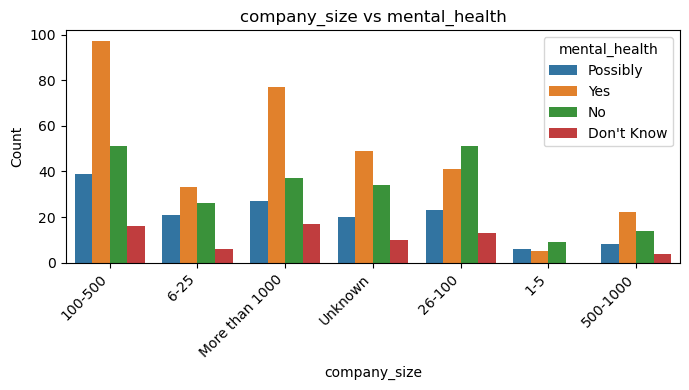

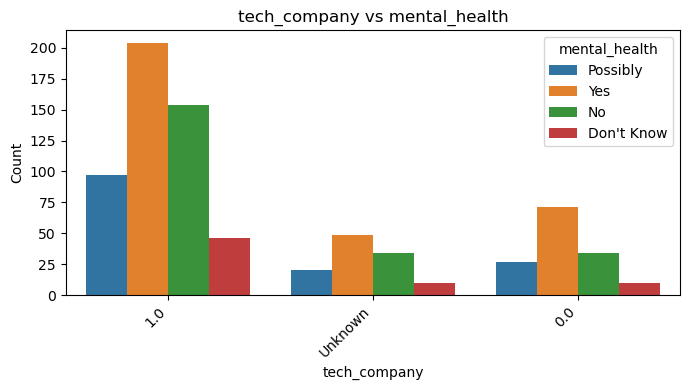

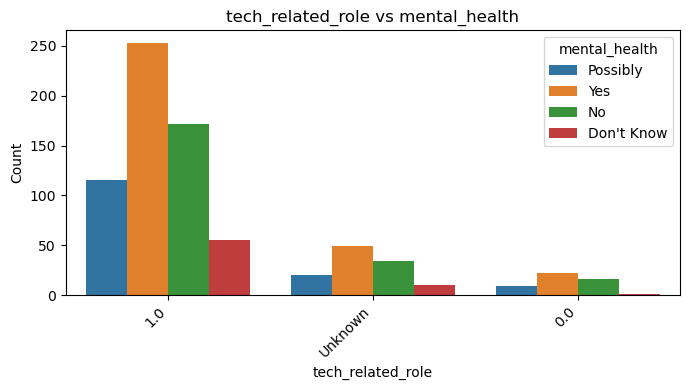

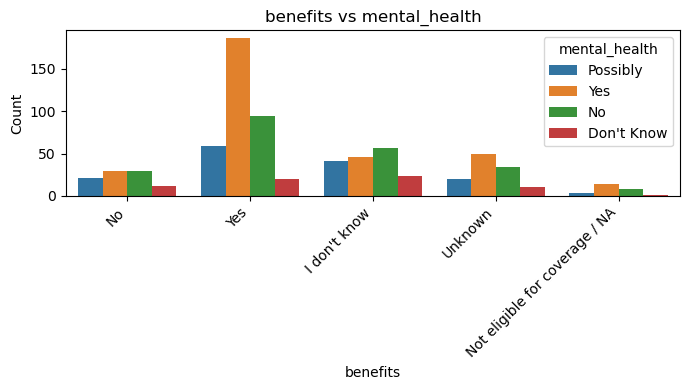

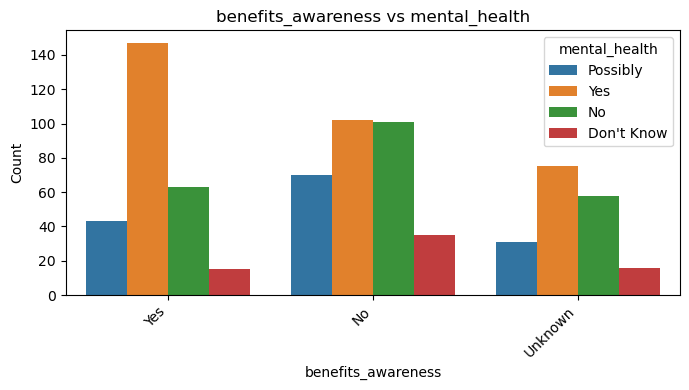

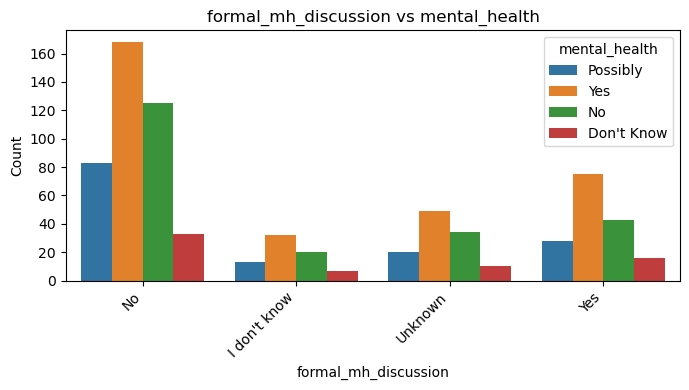

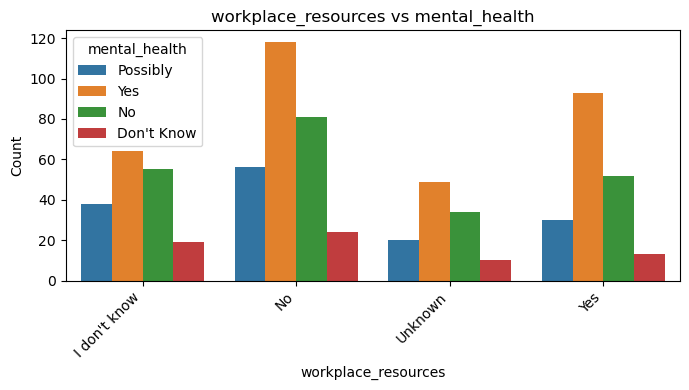

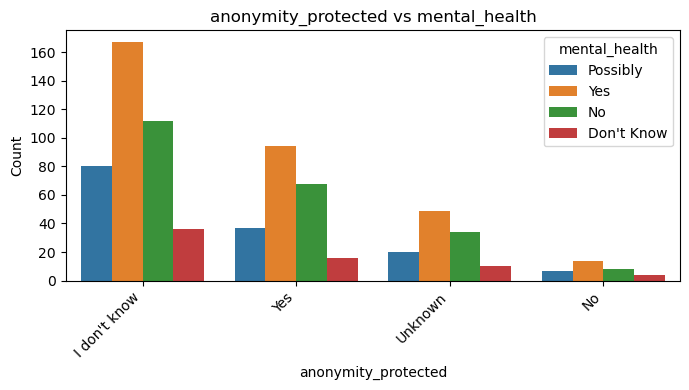

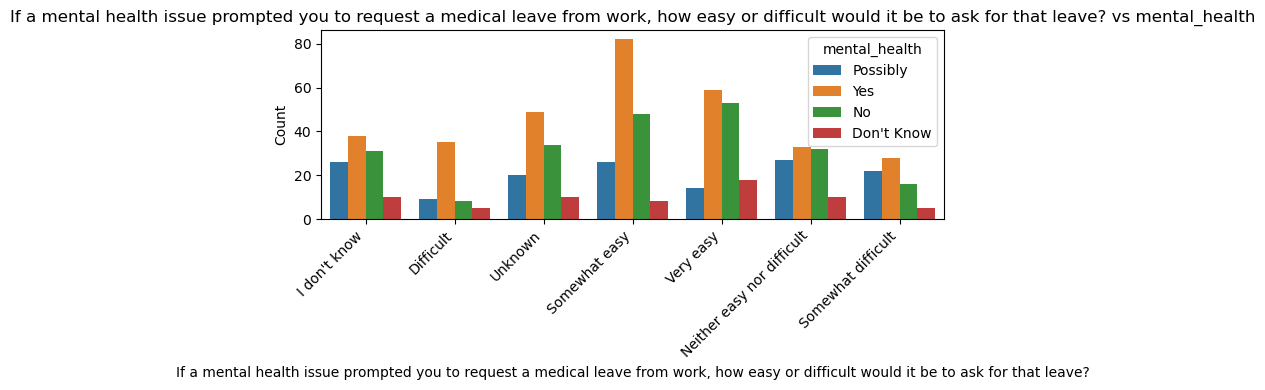

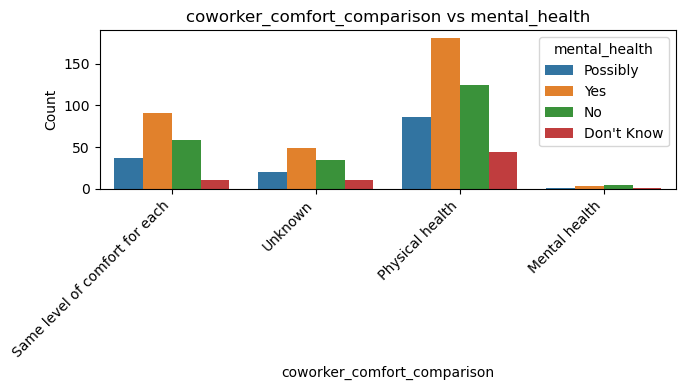

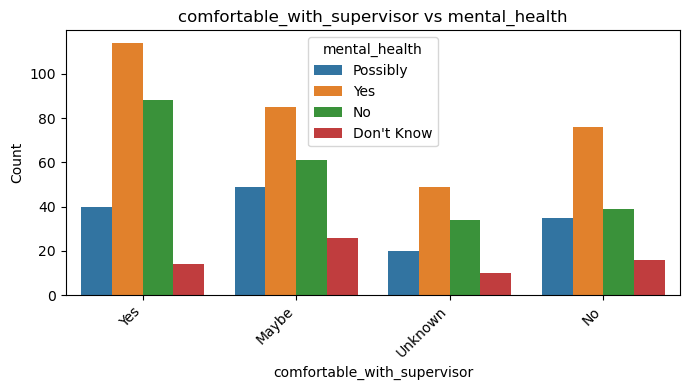

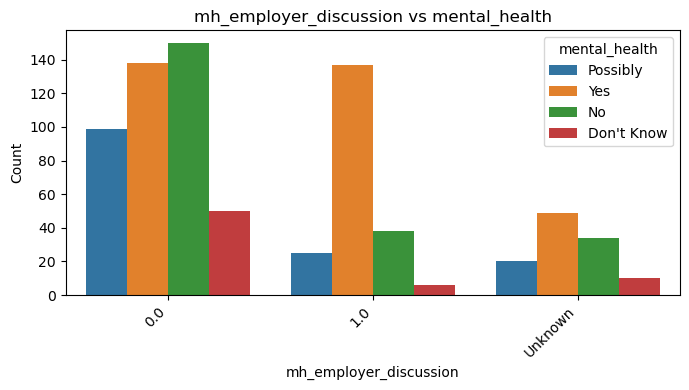

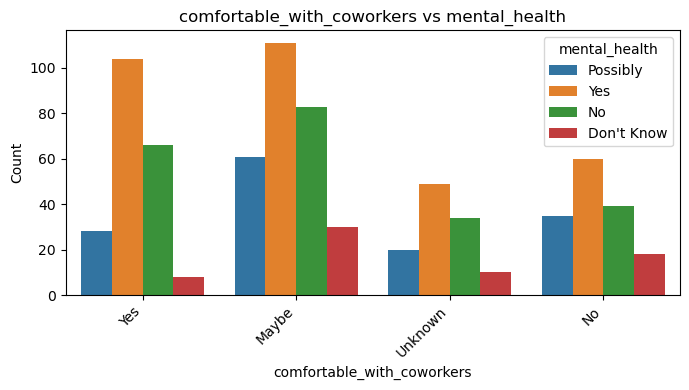

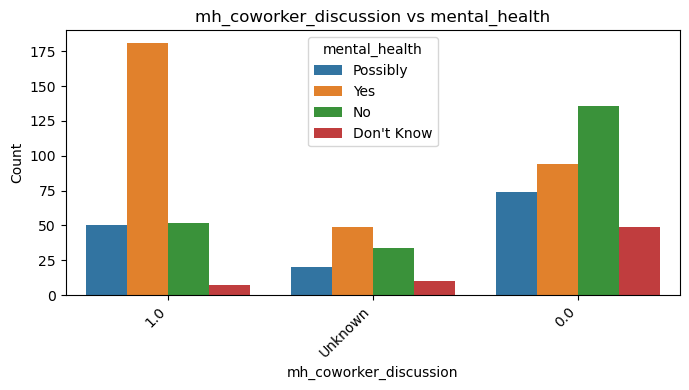

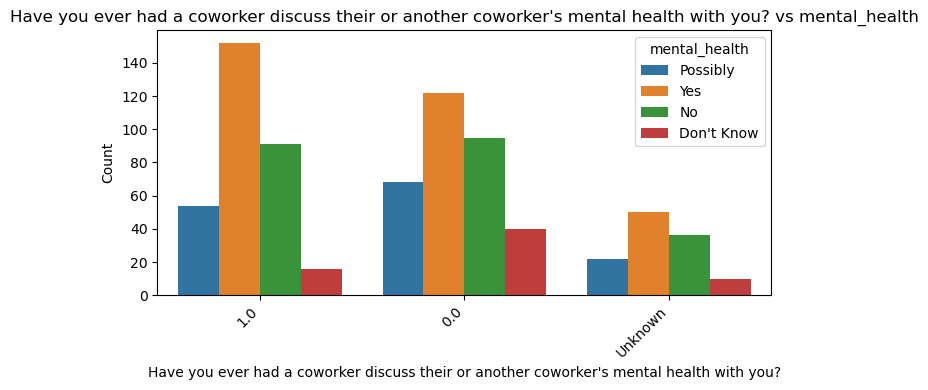

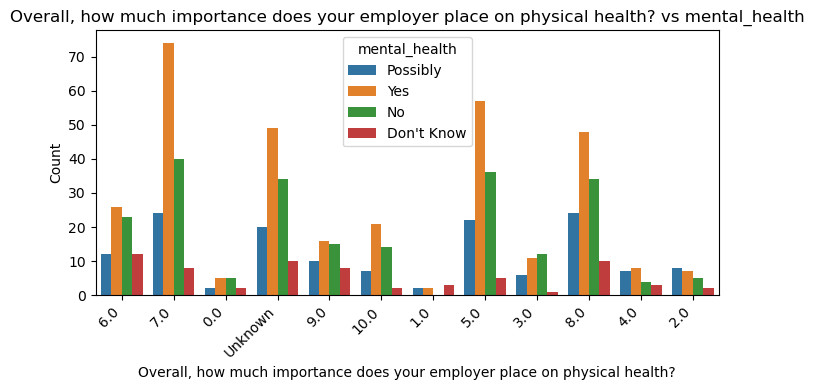

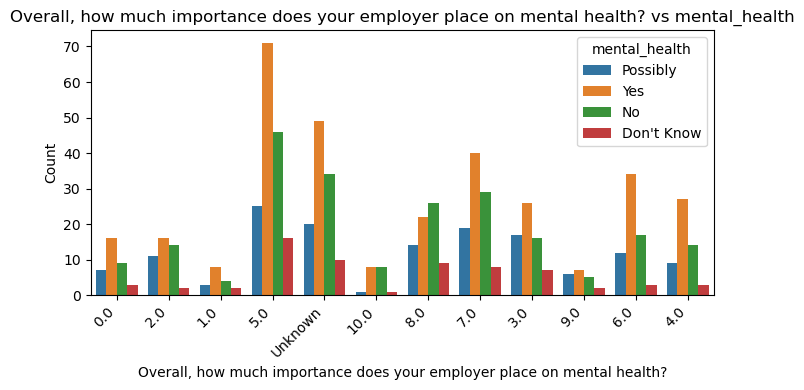

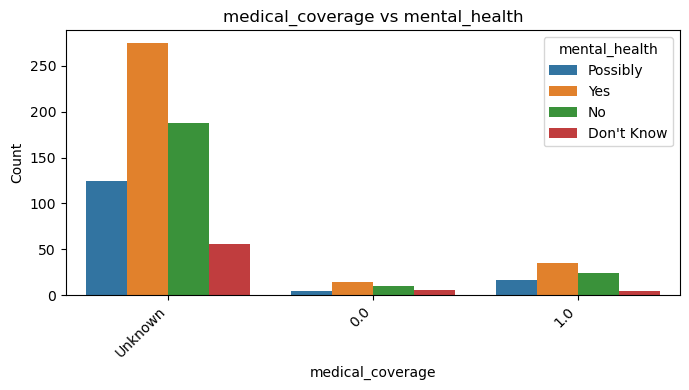

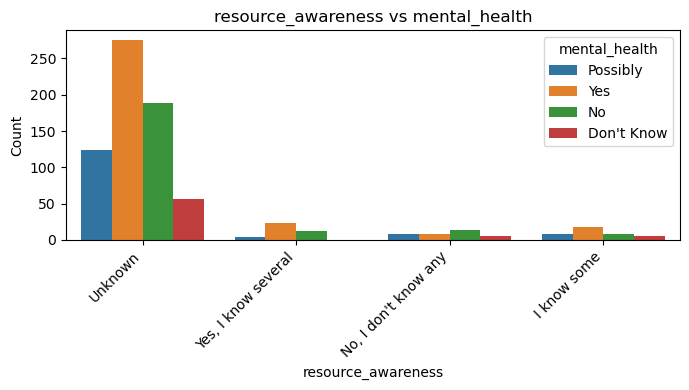

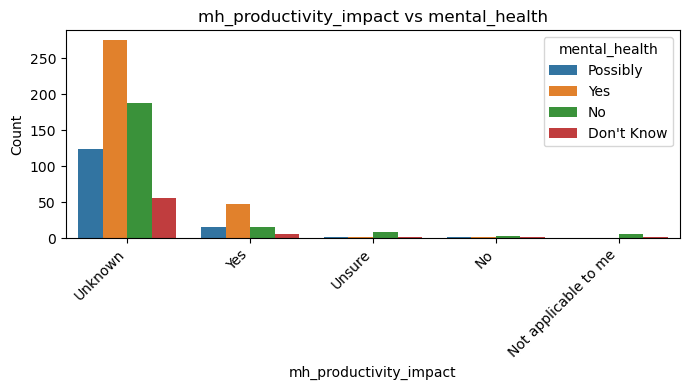

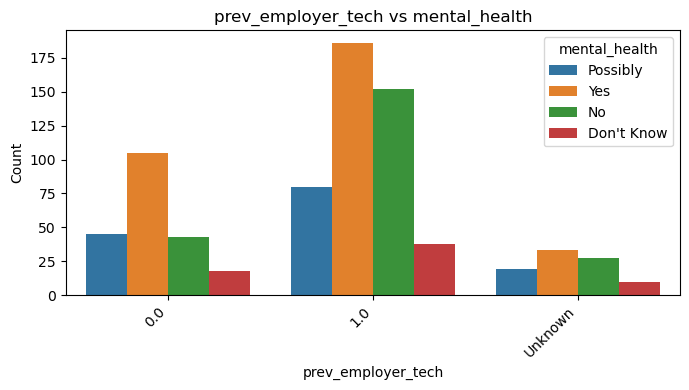

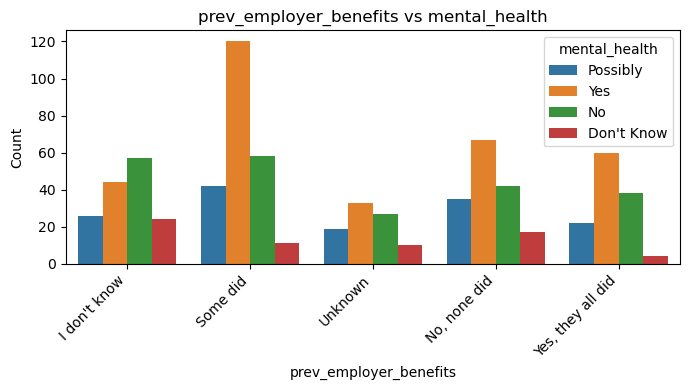

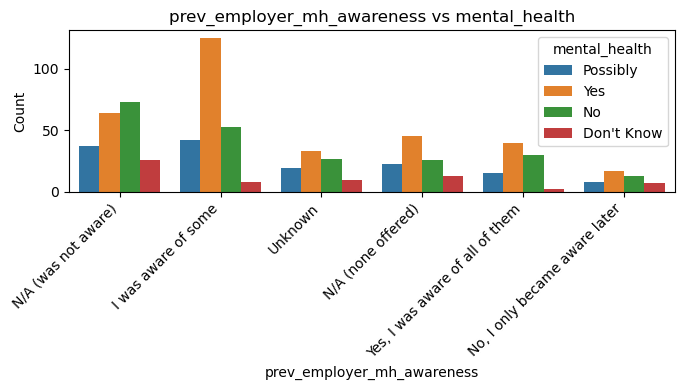

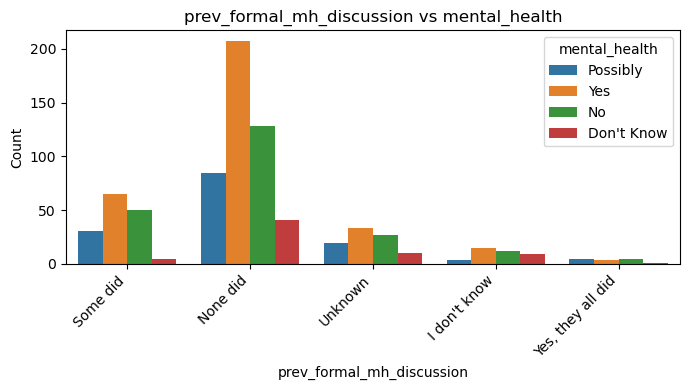

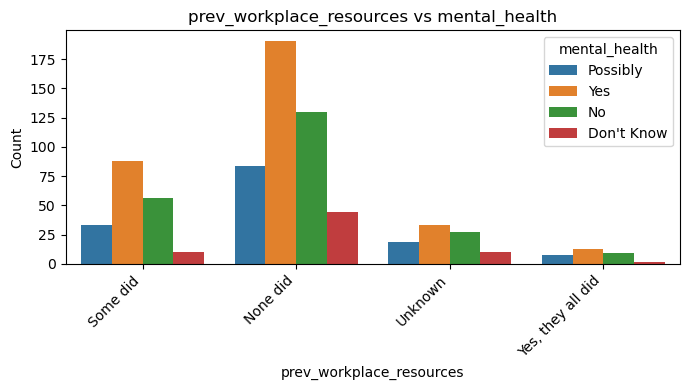

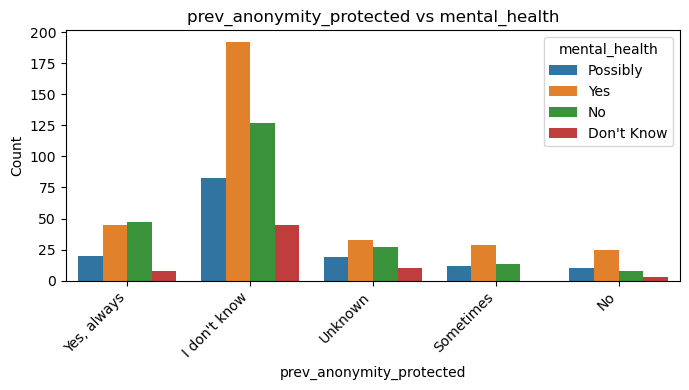

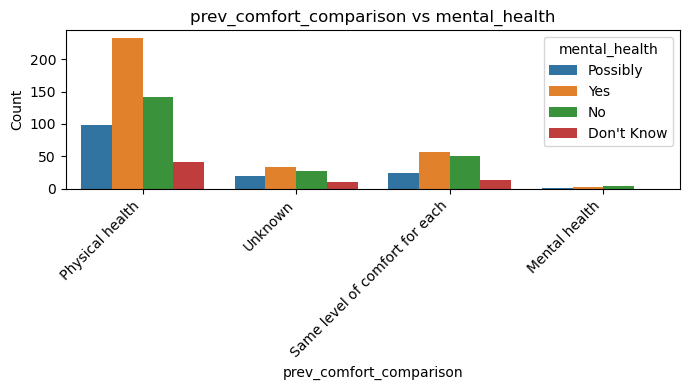

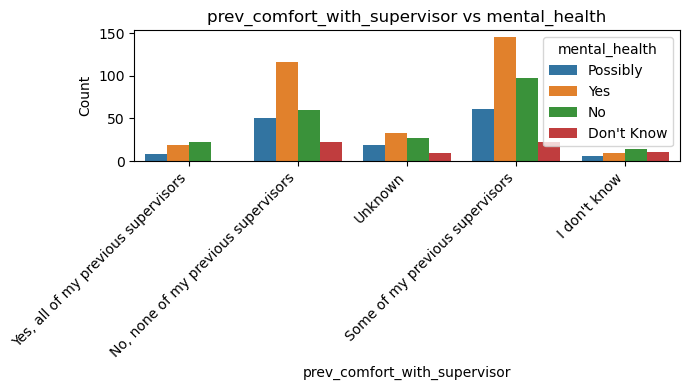

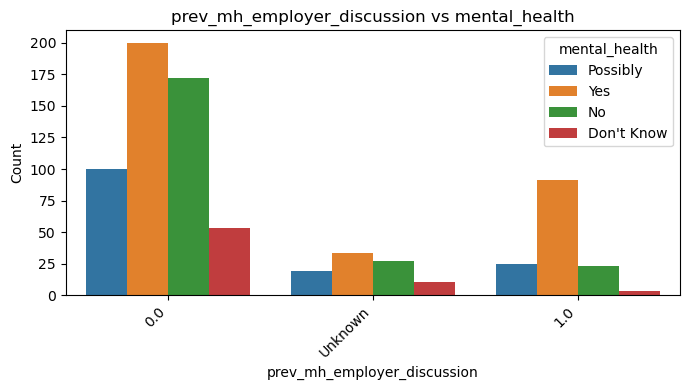

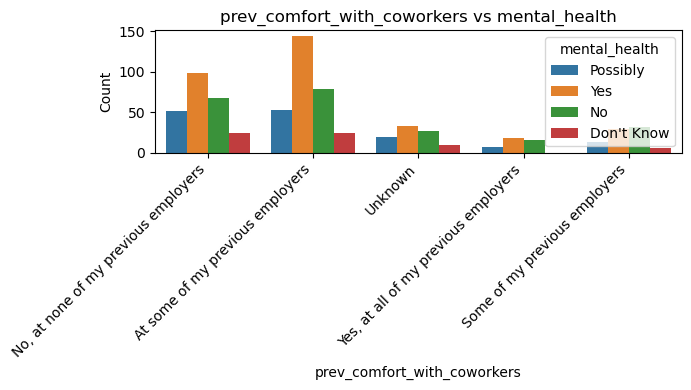

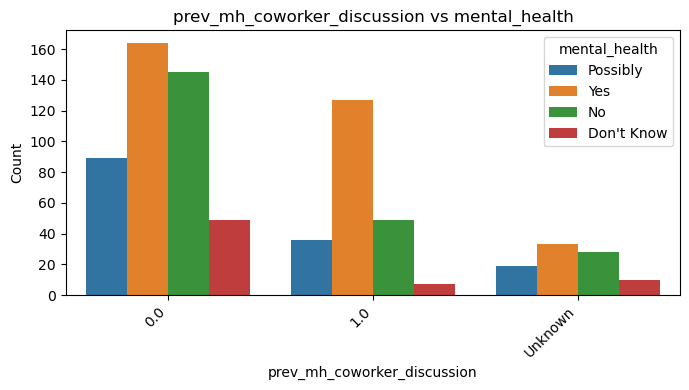

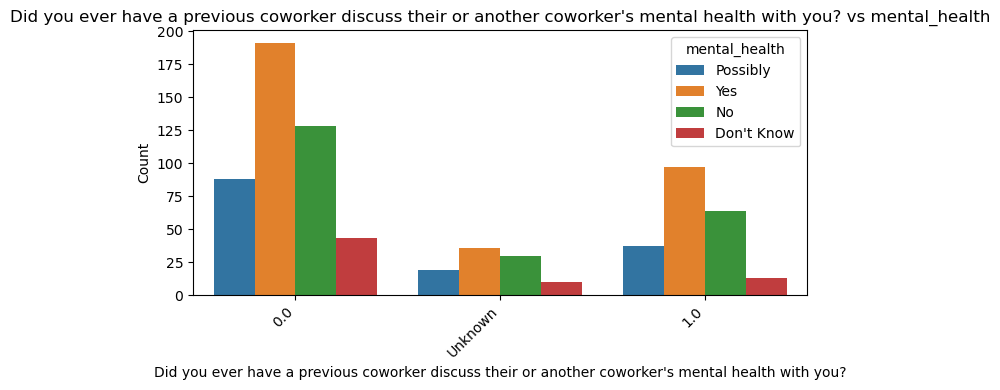

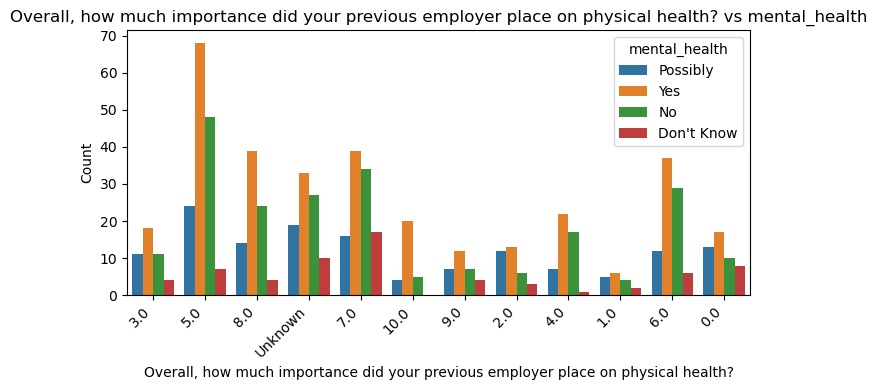

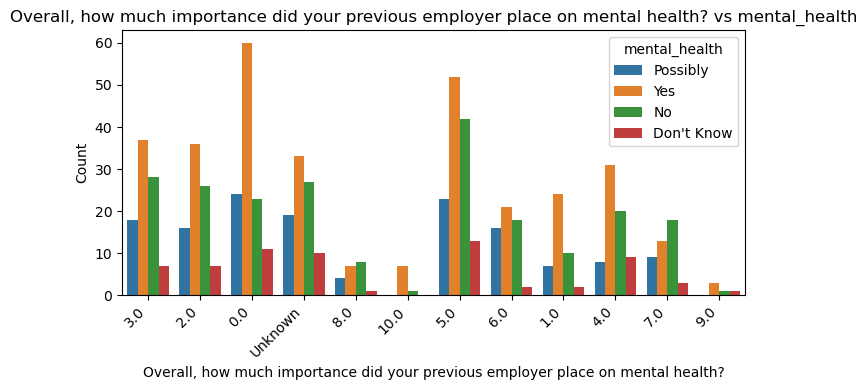

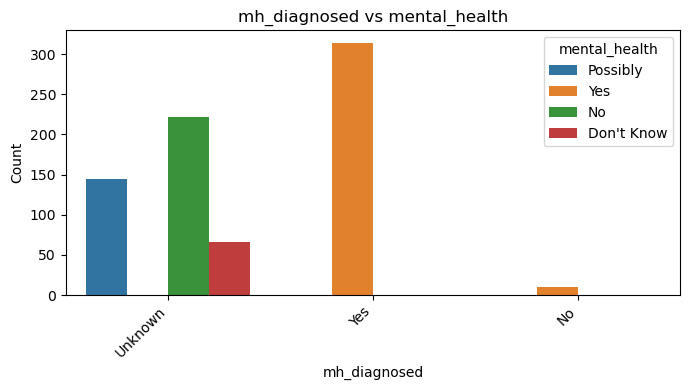

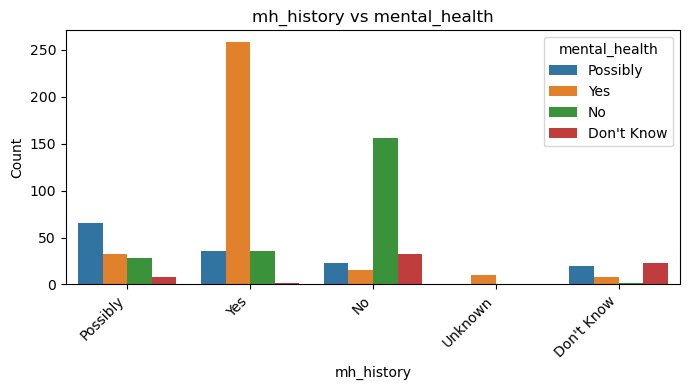

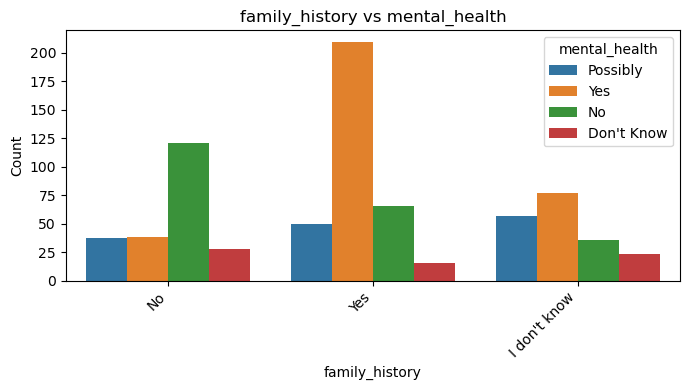

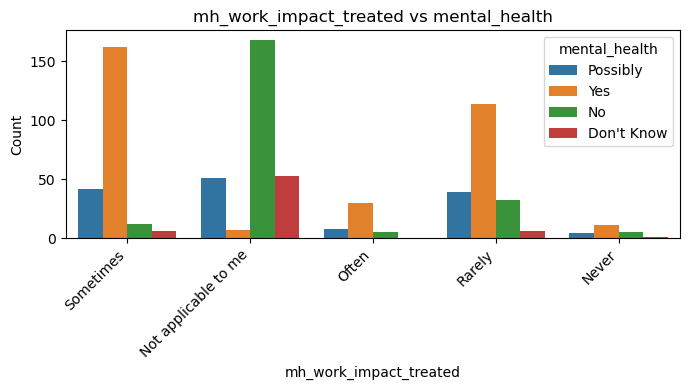

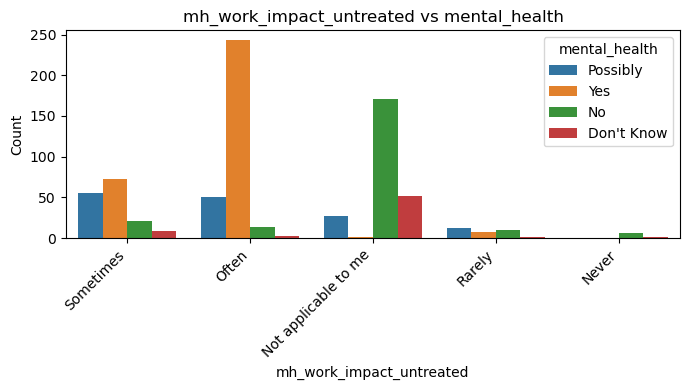

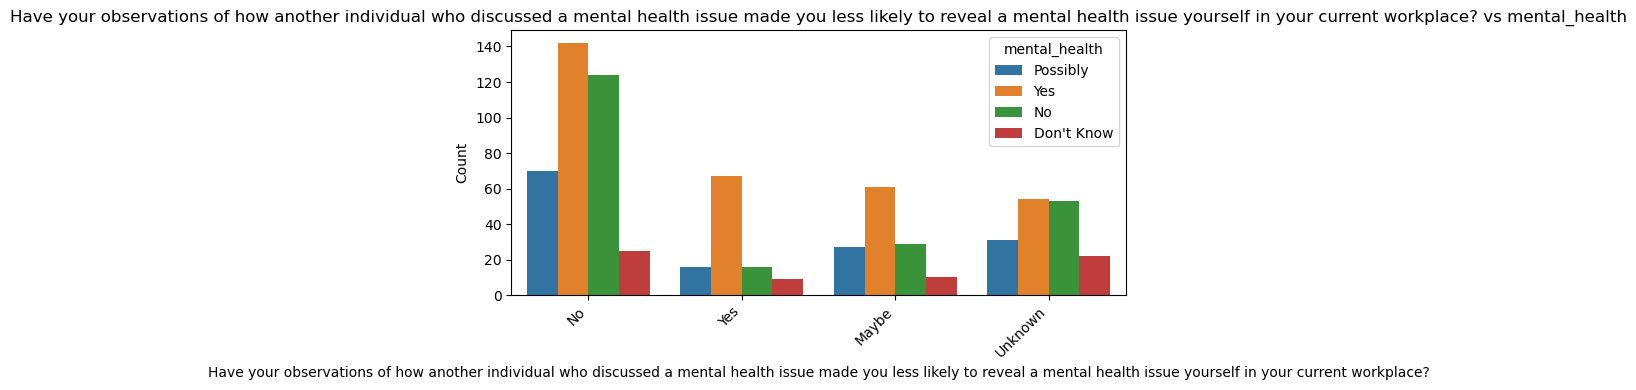

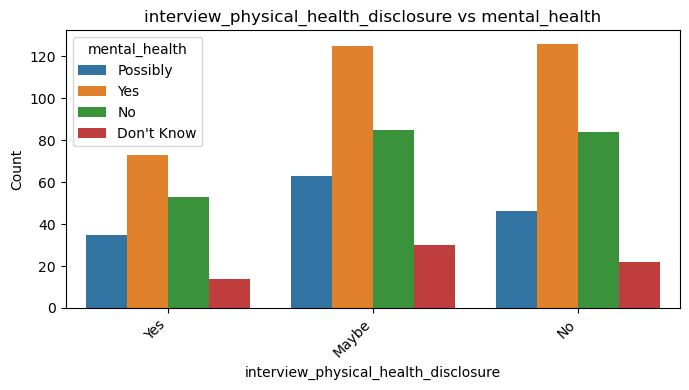

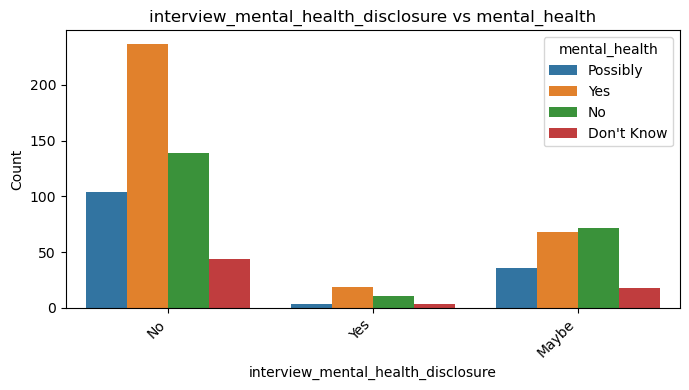

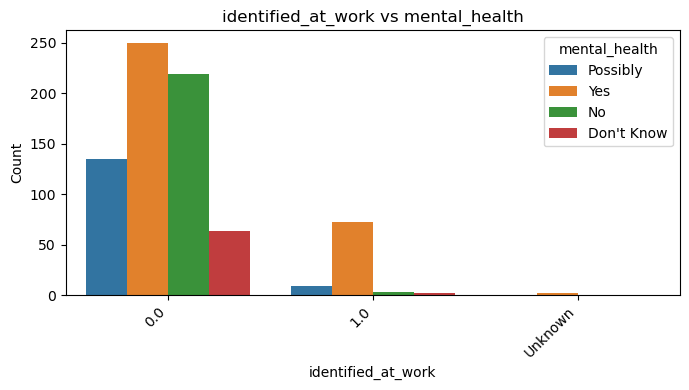

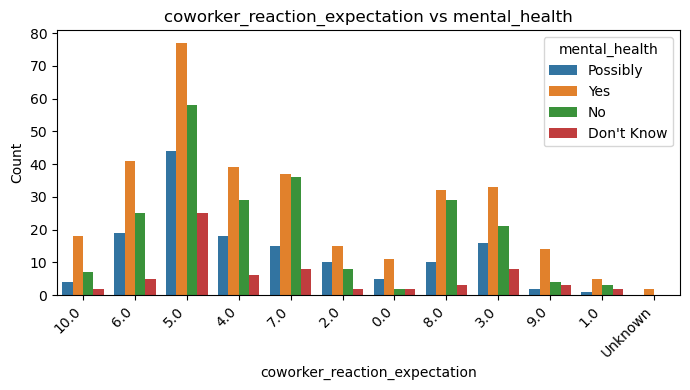

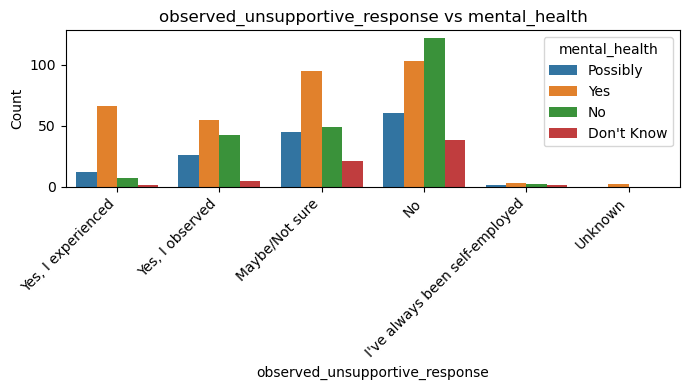

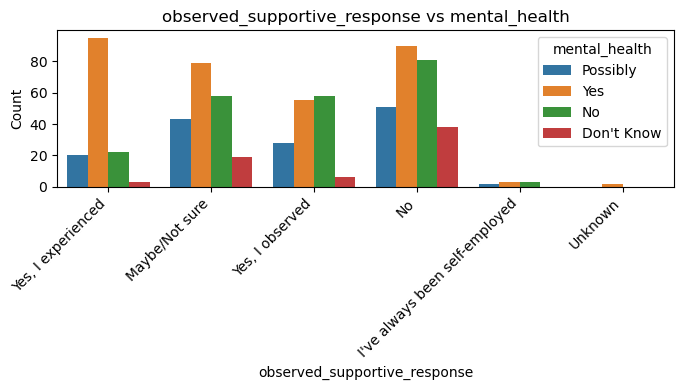

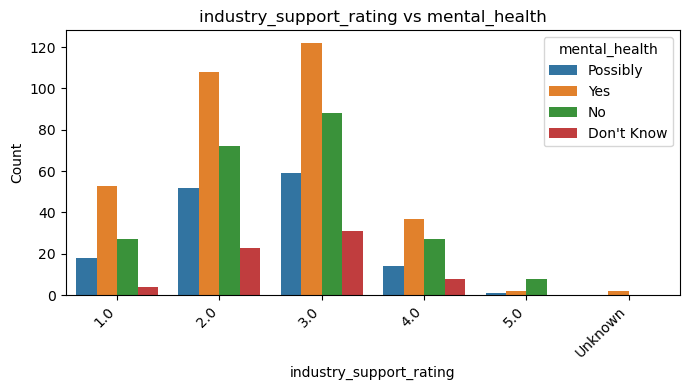

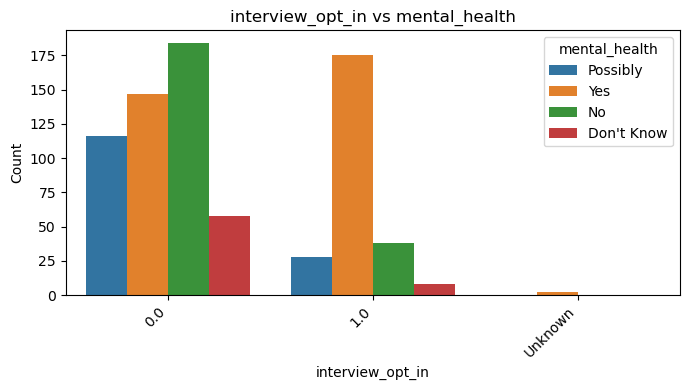

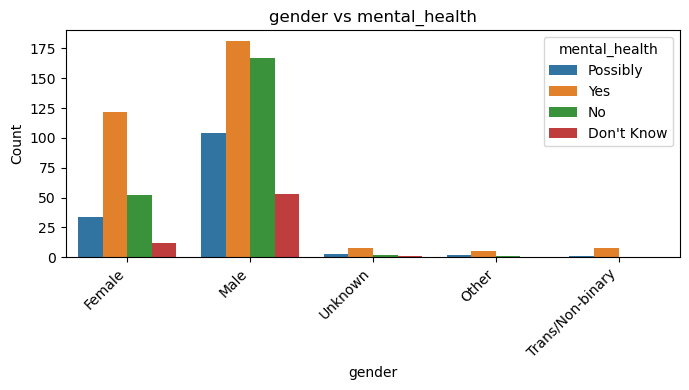

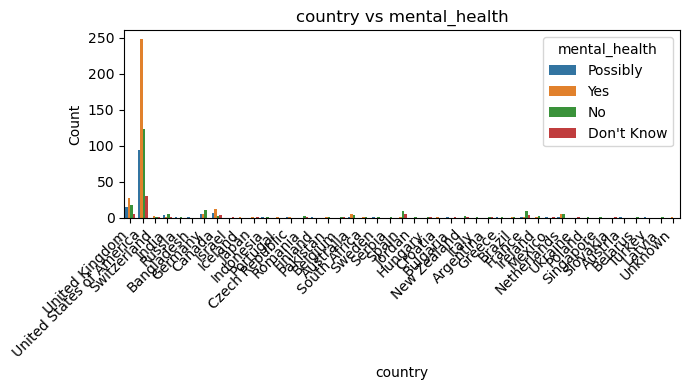

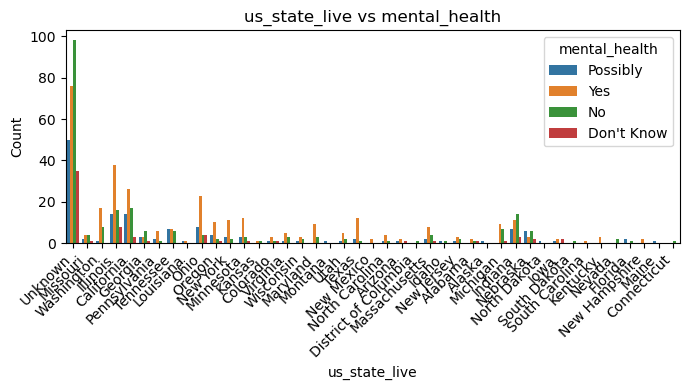

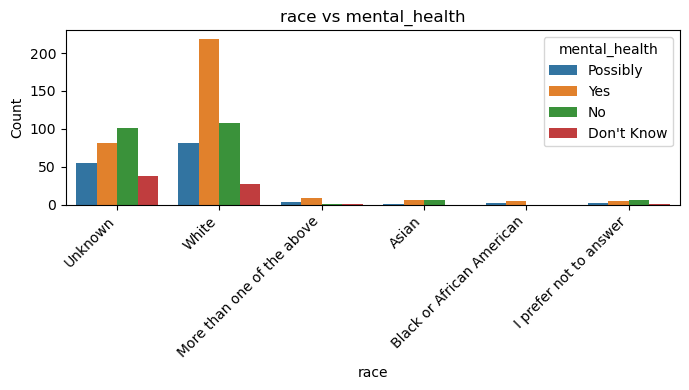

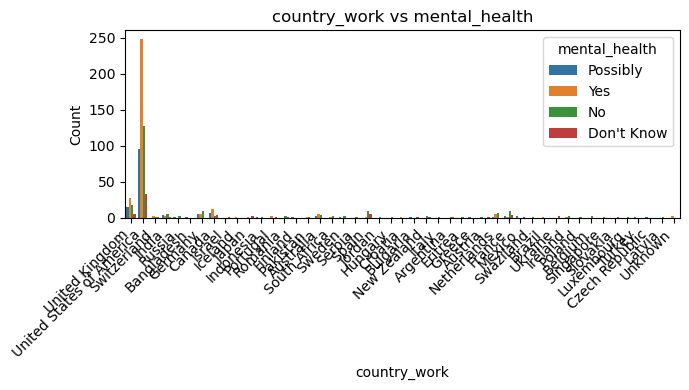

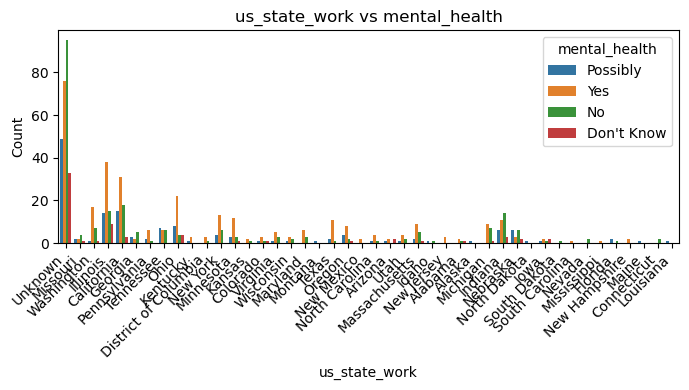

In [29]:
df_cat = df.select_dtypes(include=["object","category"])

for col in df_cat.columns:
    if col == "mental_health":  # skip target itself
        continue
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue="mental_health")
    plt.title(f"{col} vs mental_health")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.legend(title="mental_health")
    plt.tight_layout()
    plt.show()


* Numeric Feature Distributions

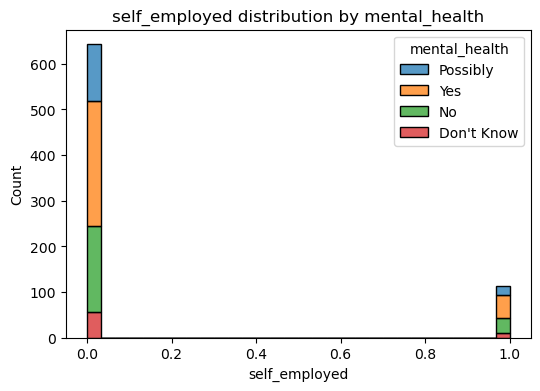

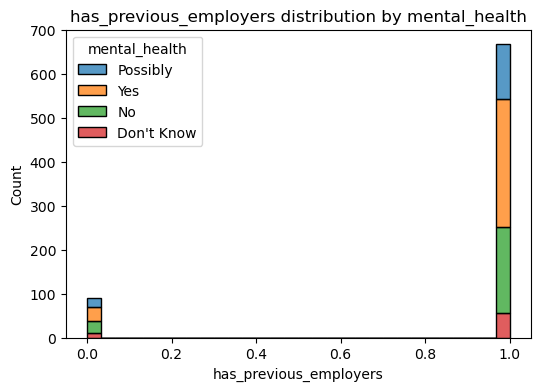

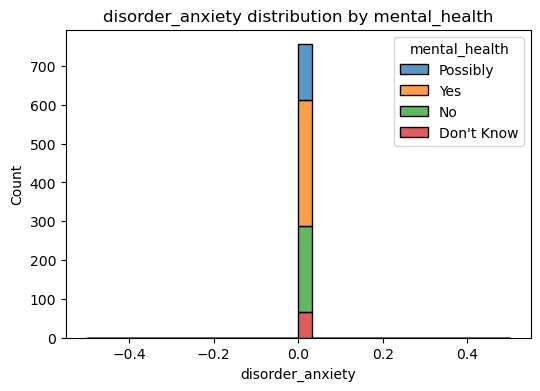

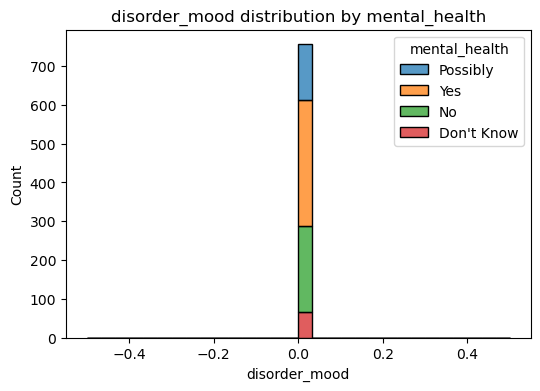

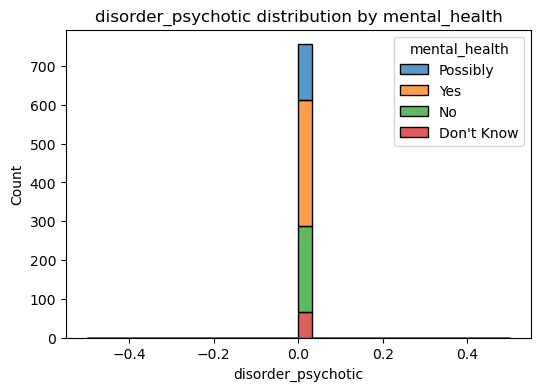

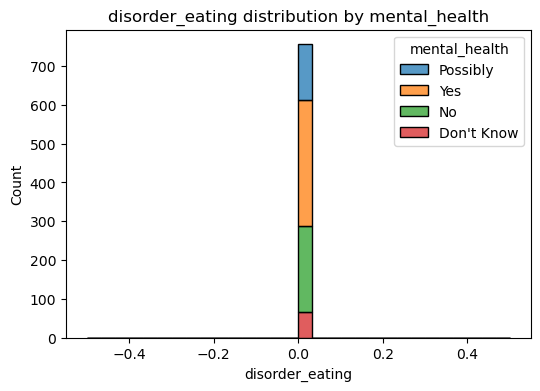

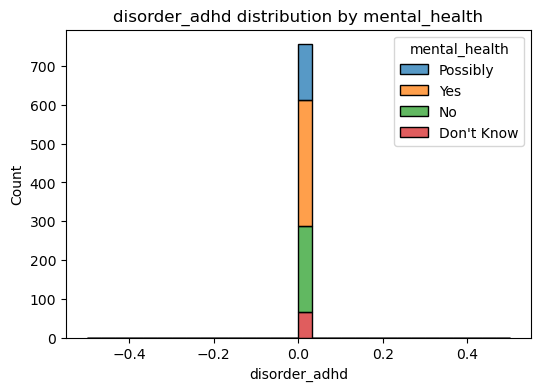

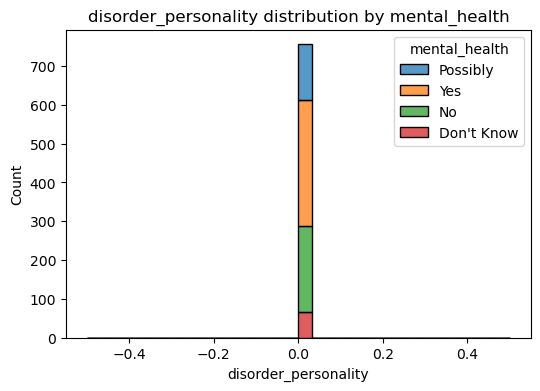

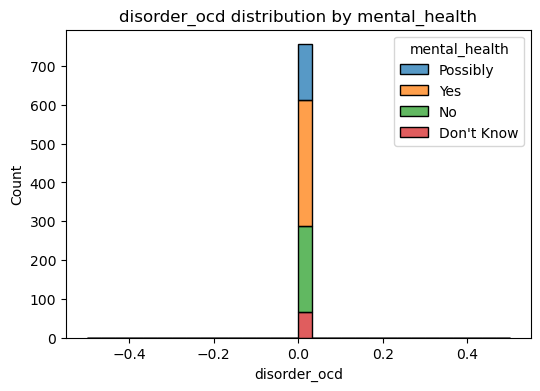

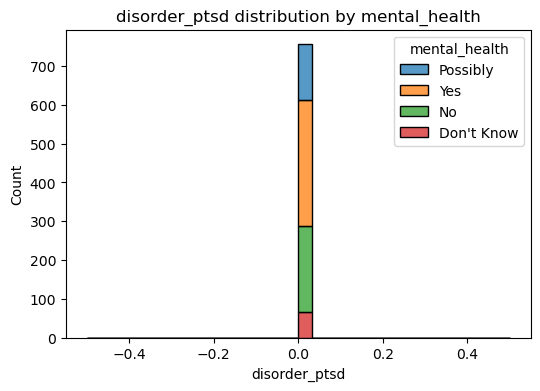

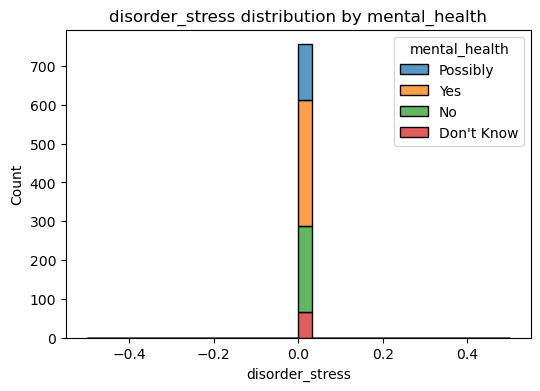

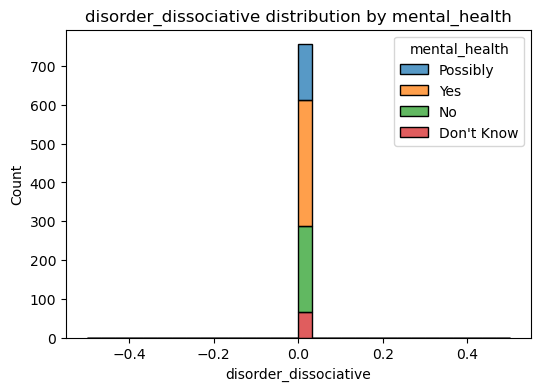

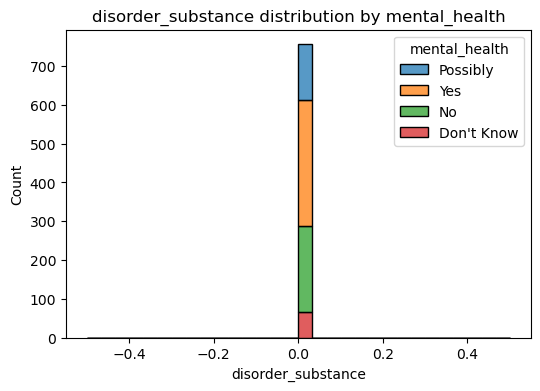

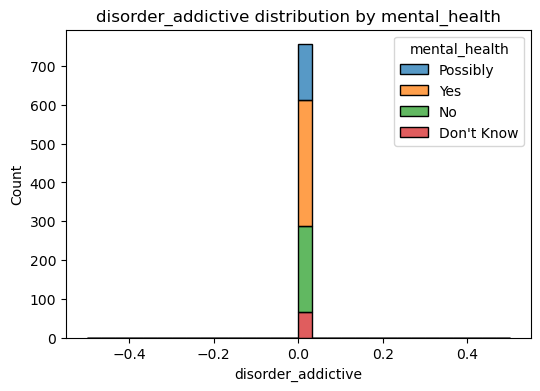

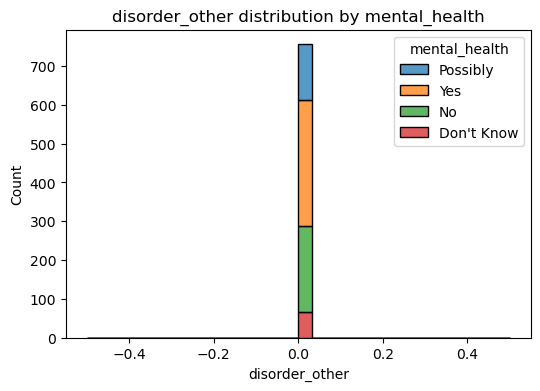

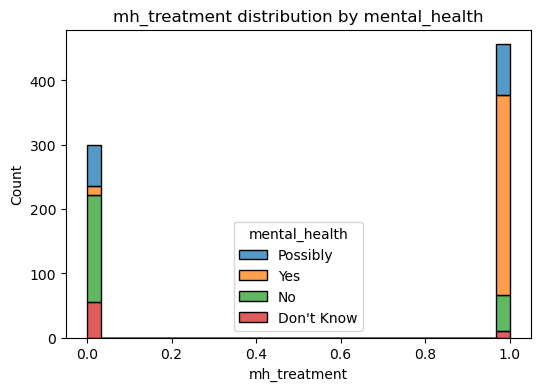

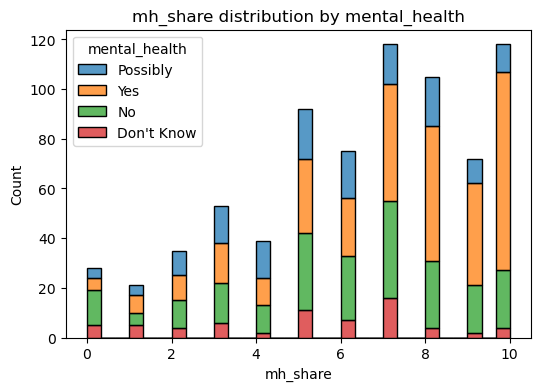

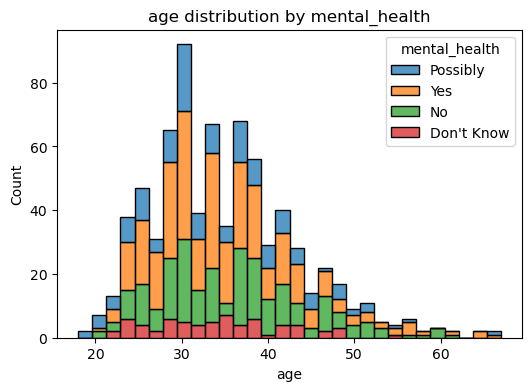

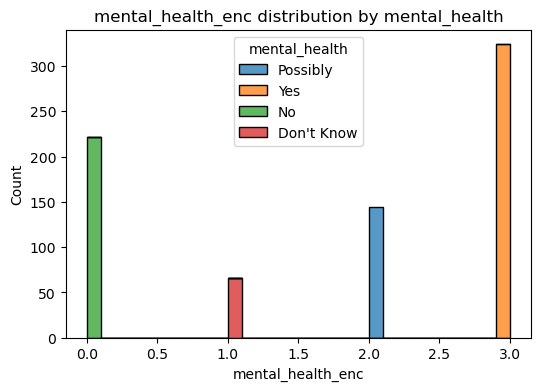

In [30]:
import seaborn as sns

# Step 1: Create df_num from your full DataFrame
df_num = df.select_dtypes(include=['int64', 'float64'])

for col in df_num.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue="mental_health", multiple="stack", bins=30)
    plt.title(f"{col} distribution by mental_health")
    plt.show()



* Spot Outliers

In [31]:
import pandas as pd

# ✅ Create a summary of outliers per numeric column
outlier_summary = []

for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total = df_num.shape[0]
    percent = round((outlier_count / total) * 100, 2)

    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Percent of Total': percent
    })

# ✅ Convert to DataFrame and display
outlier_df = pd.DataFrame(outlier_summary).sort_values(by='Percent of Total', ascending=False)
print("📌 Outlier Summary:")
print(outlier_df)


📌 Outlier Summary:
                   Feature  Outlier Count  Percent of Total
0            self_employed            113             14.95
1   has_previous_employers             89             11.77
17                     age             15              1.98
10         disorder_stress              0              0.00
16                mh_share              0              0.00
15            mh_treatment              0              0.00
14          disorder_other              0              0.00
13      disorder_addictive              0              0.00
12      disorder_substance              0              0.00
11   disorder_dissociative              0              0.00
9            disorder_ptsd              0              0.00
8             disorder_ocd              0              0.00
7     disorder_personality              0              0.00
6            disorder_adhd              0              0.00
5          disorder_eating              0              0.00
4       disorder_psyc

# Feature Selection

In [32]:
# ANOVA F-test (SelectKBest)

from sklearn.feature_selection import SelectKBest, f_classif

# Encode target labels
label_order = ['No', "Don't Know", 'Possibly', 'Yes']
label2id = {label: i for i, label in enumerate(label_order)}
df['mental_health_enc'] = df['mental_health'].map(label2id)

# Prepare features and target
X = df.drop(columns=['mental_health', 'mental_health_enc'])
X_encoded = pd.get_dummies(X)  # one-hot encode categorical features
y = df['mental_health_enc']

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_encoded, y)
selected_features = X_encoded.columns[selector.get_support()]

print("📌 Top 10 Selected Features:")
print(selected_features.tolist())


📌 Top 10 Selected Features:
['mh_treatment', 'mh_diagnosed_Unknown', 'mh_diagnosed_Yes', 'mh_history_No', 'mh_history_Yes', 'family_history_No', 'mh_work_impact_treated_Not applicable to me', 'mh_work_impact_treated_Sometimes', 'mh_work_impact_untreated_Not applicable to me', 'mh_work_impact_untreated_Often']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [  2   3   4   5   6   7   8   9  10  11  12  13  14 191] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


* Choosing Features - Looking at the different areas:
- Workplace Support: benefits, workplace_resources, formal_mh_discussion, comfortable_with_supervisor
- Disclosure & Comfort: mh_share, interview_mental_health_disclosure, coworker_comfort_comparison
- Mental Health History: mh_history, mh_diagnosed, family_history, mh_treatment
- Observed Reactions: observed_supportive_response, coworker_reaction_expectation
- Demographics: age, gender, race, self_employed, company_size

* Decided to include the following: top_features = 
    'mh_diagnosed', 'mh_history', 'mh_treatment', 'mh_share',
    'coworker_reaction_expectation', 'observed_supportive_response',
    'family_history', 'age', 'gender', 'company_size'

In [33]:
top_features = [
    'mh_diagnosed',
    'mh_history',
    'mh_treatment',
    'mh_share',
    'coworker_reaction_expectation',
    'observed_supportive_response',
    'family_history',
    'age',
    'gender',
    'company_size'
]

In [34]:
# Reviewed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, recall_score, roc_auc_score
)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ✅ Step 1: Define top features
top_features = [
    'mh_diagnosed', 'mh_history', 'mh_treatment', 'mh_share',
    'coworker_reaction_expectation', 'observed_supportive_response',
    'family_history', 'age', 'gender', 'company_size'
]

# ✅ Step 2: Prepare data
df = df.dropna(subset=['mental_health'])
df = df[top_features + ['mental_health']]

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

X = df[top_features]
y = df['mental_health']

# ✅ Step 3: Define sampling methods
sampling_methods = {
    'None': None,
    'Normalization': MinMaxScaler(),
    'Oversampling': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# ✅ Step 4: Initialize results table
results = pd.DataFrame(columns=[
    'Model', 'Sampling Method', 'Accuracy', 'Macro F1', 'Weighted F1',
    'Recall', 'Precision', 'ROC-AUC'
])

# ✅ Step 5: Loop through sampling methods
for method_name, sampler in sampling_methods.items():
    # Split original data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply normalization
    if method_name == 'Normalization':
        scaler = sampler
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Apply resampling
    elif sampler is not None:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # ✅ ROC-AUC for multiclass
    try:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    except ValueError:
        roc_auc = None

    print(f"\n🔹 Random Forest with {method_name}")
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc_auc, 4) if roc_auc else "N/A")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Store results
    row = pd.DataFrame([{
        'Model': 'Random Forest',
        'Sampling Method': method_name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'Weighted F1': round(weighted_f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc else None
    }])
    results = pd.concat([results, row], ignore_index=True)

# ✅ Export results
results.to_excel('random_forest_sampling_comparison.xlsx', index=False)
print("\n📊 Summary Table:")
print(results)



🔹 Random Forest with None
Accuracy: 0.7829
ROC-AUC: 0.9357
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.22        10
           1       0.72      0.80      0.76        51
           2       0.50      0.42      0.46        26
           3       1.00      1.00      1.00        65

    accuracy                           0.78       152
   macro avg       0.62      0.61      0.61       152
weighted avg       0.77      0.78      0.78       152


🔹 Random Forest with Normalization
Accuracy: 0.7895
ROC-AUC: 0.9351
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.20      0.24        10
           1       0.72      0.82      0.77        51
           2       0.50      0.42      0.46        26
           3       1.00      1.00      1.00        65

    accuracy                           0.79       152
   macro avg       0.63      0.61      0.62       152
weighted

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/2160909896.py:99: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, row], ignore_index=True)



🔹 Random Forest with SMOTE
Accuracy: 0.75
ROC-AUC: 0.9366
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.30      0.24        10
           1       0.73      0.65      0.69        51
           2       0.48      0.50      0.49        26
           3       1.00      1.00      1.00        65

    accuracy                           0.75       152
   macro avg       0.60      0.61      0.60       152
weighted avg       0.77      0.75      0.76       152


📊 Summary Table:
           Model Sampling Method  Accuracy  Macro F1  Weighted F1  Recall  \
0  Random Forest            None    0.7829    0.6100       0.7754  0.7829   
1  Random Forest   Normalization    0.7895    0.6161       0.7801  0.7895   
2  Random Forest    Oversampling    0.8026    0.6677       0.8029  0.8026   
3  Random Forest   Undersampling    0.6776    0.5770       0.6916  0.6776   
4  Random Forest           SMOTE    0.7500    0.6045       0.7580  0.7500   

 

In [35]:
#Reviewed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score,
    roc_auc_score, average_precision_score, classification_report
)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ✅ Step 1: Define top features
top_features = [
    'mh_diagnosed', 'mh_history', 'mh_treatment', 'mh_share',
    'coworker_reaction_expectation', 'observed_supportive_response',
    'family_history', 'age', 'gender', 'company_size'
]

# ✅ Step 2: Prepare data
df = df.dropna(subset=['mental_health'])
df = df[top_features + ['mental_health']]

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

X = df[top_features]
y = df['mental_health']

# ✅ Step 3: Define sampling methods
sampling_methods = {
    'None': None,
    'Normalization': MinMaxScaler(),
    'Oversampling': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# ✅ Step 4: Initialize results table
results = pd.DataFrame(columns=[
    'Model', 'Sampling Method', 'Accuracy', 'Macro F1', 'Weighted F1',
    'Recall', 'Precision', 'ROC-AUC', 'PR-AUC'
])

# ✅ Step 5: Loop through sampling methods
for method_name, sampler in sampling_methods.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if method_name == 'Normalization':
        scaler = sampler
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif sampler is not None:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    model = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    try:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        pr_auc = average_precision_score(y_test, y_proba, average='weighted')
    except Exception as e:
        print(f"⚠️ ROC-AUC/PR-AUC error for {method_name}: {e}")
        roc_auc = None
        pr_auc = None

    print(f"\n🔹 Logistic Regression with {method_name}")
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc_auc, 4) if roc_auc else "N/A")
    print("PR-AUC:", round(pr_auc, 4) if pr_auc else "N/A")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    row = pd.DataFrame([{
        'Model': 'Logistic Regression',
        'Sampling Method': method_name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'Weighted F1': round(weighted_f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc else None,
        'PR-AUC': round(pr_auc, 4) if pr_auc else None
    }])
    results = pd.concat([results, row], ignore_index=True)

# ✅ Export results
results.to_excel('logistic_regression_sampling_comparison.xlsx', index=False)
print("\n📊 Summary Table:")
print(results)



🔹 Logistic Regression with None
Accuracy: 0.7961
ROC-AUC: 0.9173
PR-AUC: 0.773
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.10      0.14        10
           1       0.72      0.84      0.77        51
           2       0.56      0.54      0.55        26
           3       1.00      0.97      0.98        65

    accuracy                           0.80       152
   macro avg       0.63      0.61      0.61       152
weighted avg       0.78      0.80      0.78       152


🔹 Logistic Regression with Normalization
Accuracy: 0.7829
ROC-AUC: 0.9146
PR-AUC: 0.7605
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.69      0.82      0.75        51
           2       0.54      0.54      0.54        26
           3       1.00      0.97      0.98        65

    accuracy                           0.78       152
   macro avg       0.

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/1359862455.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, row], ignore_index=True)



🔹 Logistic Regression with SMOTE
Accuracy: 0.7368
ROC-AUC: 0.9091
PR-AUC: 0.7723
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.80      0.38        10
           1       0.80      0.47      0.59        51
           2       0.63      0.65      0.64        26
           3       1.00      0.97      0.98        65

    accuracy                           0.74       152
   macro avg       0.67      0.72      0.65       152
weighted avg       0.82      0.74      0.75       152


📊 Summary Table:
                 Model Sampling Method  Accuracy  Macro F1  Weighted F1  \
0  Logistic Regression            None    0.7961    0.6128       0.7842   
1  Logistic Regression   Normalization    0.7829    0.5682       0.7647   
2  Logistic Regression    Oversampling    0.7171    0.6240       0.7321   
3  Logistic Regression   Undersampling    0.7105    0.6188       0.7256   
4  Logistic Regression           SMOTE    0.7368    0.6499       0

In [36]:
#Reviewed
from sklearn.metrics import roc_auc_score, average_precision_score
from xgboost import XGBClassifier

# ✅ Step 4: Initialize results table
results = pd.DataFrame(columns=[
    'Model', 'Sampling Method', 'Accuracy', 'Macro F1', 'Weighted F1',
    'Recall', 'Precision', 'ROC-AUC', 'PR-AUC'
])

# ✅ Step 5: Loop through sampling methods
for method_name, sampler in sampling_methods.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if method_name == 'Normalization':
        scaler = sampler
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif sampler is not None:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    try:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        pr_auc = average_precision_score(y_test, y_proba, average='weighted')
    except Exception as e:
        print(f"⚠️ ROC-AUC/PR-AUC error for {method_name}: {e}")
        roc_auc = None
        pr_auc = None

    print(f"\n🔹 XGBoost with {method_name}")
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc_auc, 4) if roc_auc else "N/A")
    print("PR-AUC:", round(pr_auc, 4) if pr_auc else "N/A")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    row = pd.DataFrame([{
        'Model': 'XGBoost',
        'Sampling Method': method_name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'Weighted F1': round(weighted_f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc else None,
        'PR-AUC': round(pr_auc, 4) if pr_auc else None
    }])
    results = pd.concat([results, row], ignore_index=True)

# ✅ Export results
results.to_excel('xgboost_sampling_comparison.xlsx', index=False)
print("\n📊 Summary Table:")
print(results)



🔹 XGBoost with None
Accuracy: 0.7632
ROC-AUC: 0.9187
PR-AUC: 0.7618
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.30      0.29        10
           1       0.73      0.69      0.71        51
           2       0.46      0.50      0.48        26
           3       1.00      1.00      1.00        65

    accuracy                           0.76       152
   macro avg       0.62      0.62      0.62       152
weighted avg       0.77      0.76      0.77       152



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:06:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/3491914183.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, row], ignore_index=True)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:06:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost with Normalization
Accuracy: 0.7632
ROC-AUC: 0.9187
PR-AUC: 0.7618
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.30      0.29        10
           1       0.73      0.69      0.71        51
           2       0.46      0.50      0.48        26
           3       1.00      1.00      1.00        65

    accuracy                           0.76       152
   macro avg       0.62      0.62      0.62       152
weighted avg       0.77      0.76      0.77       152



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:06:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost with Oversampling
Accuracy: 0.75
ROC-AUC: 0.9179
PR-AUC: 0.7655
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.40      0.31        10
           1       0.74      0.67      0.70        51
           2       0.44      0.42      0.43        26
           3       1.00      1.00      1.00        65

    accuracy                           0.75       152
   macro avg       0.61      0.62      0.61       152
weighted avg       0.77      0.75      0.76       152


🔹 XGBoost with Undersampling
Accuracy: 0.625
ROC-AUC: 0.8822
PR-AUC: 0.7109
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.50      0.21        10
           1       0.62      0.31      0.42        51
           2       0.42      0.42      0.42        26
           3       1.00      0.97      0.98        65

    accuracy                           0.62       152
   macro avg       0.54      0.55      

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:06:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:06:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
#Reviewed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, recall_score, roc_auc_score, average_precision_score
)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ✅ Step 1: Define top features
top_features = [
    'mh_diagnosed', 'mh_history', 'mh_treatment', 'mh_share',
    'coworker_reaction_expectation', 'observed_supportive_response',
    'family_history', 'age', 'gender', 'company_size'
]

# ✅ Step 2: Prepare data
df = df.dropna(subset=['mental_health'])
df = df[top_features + ['mental_health']]

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

X = df[top_features]
y = df['mental_health']

# ✅ Step 3: Define sampling methods
sampling_methods = {
    'None': None,
    'Normalization': MinMaxScaler(),
    'Oversampling': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# ✅ Step 4: Initialize results table
results = pd.DataFrame(columns=[
    'Model', 'Sampling Method', 'Accuracy', 'Macro F1', 'Weighted F1',
    'Recall', 'Precision', 'ROC-AUC', 'PR-AUC'
])

# ✅ Step 5: Loop through sampling methods
for method_name, sampler in sampling_methods.items():
    # Split original data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply normalization
    if method_name == 'Normalization':
        scaler = sampler
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Apply resampling
    elif sampler is not None:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    # Define base models
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    lr = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)

    # Create ensemble
    ensemble = VotingClassifier(estimators=[
        ('rf', rf),
        ('lr', lr)
    ], voting='soft')

    # Train ensemble
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # ✅ ROC-AUC and PR-AUC
    try:
        y_proba = ensemble.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        pr_auc = average_precision_score(y_test, y_proba, average='weighted')
    except Exception as e:
        print(f"⚠️ ROC-AUC/PR-AUC error for {method_name}: {e}")
        roc_auc = None
        pr_auc = None

    print(f"\n🔹 VotingClassifier with {method_name}")
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc_auc, 4) if roc_auc else "N/A")
    print("PR-AUC:", round(pr_auc, 4) if pr_auc else "N/A")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Store results
    row = pd.DataFrame([{
        'Model': 'VotingClassifier',
        'Sampling Method': method_name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'Weighted F1': round(weighted_f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc else None,
        'PR-AUC': round(pr_auc, 4) if pr_auc else None
    }])
    results = pd.concat([results, row], ignore_index=True)

# ✅ Export results
results.to_excel('voting_classifier_sampling_comparison.xlsx', index=False)
print("\n📊 Summary Table:")
print(results)




🔹 VotingClassifier with None
Accuracy: 0.8092
ROC-AUC: 0.9426
PR-AUC: 0.8056
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.10      0.13        10
           1       0.73      0.84      0.78        51
           2       0.62      0.58      0.60        26
           3       1.00      0.98      0.99        65

    accuracy                           0.81       152
   macro avg       0.64      0.63      0.63       152
weighted avg       0.79      0.81      0.80       152


🔹 VotingClassifier with Normalization
Accuracy: 0.8092
ROC-AUC: 0.9416
PR-AUC: 0.8043
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.10      0.13        10
           1       0.73      0.84      0.78        51
           2       0.62      0.58      0.60        26
           3       1.00      0.98      0.99        65

    accuracy                           0.81       152
   macro avg       0.64   

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/3182408750.py:114: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, row], ignore_index=True)



🔹 VotingClassifier with Oversampling
Accuracy: 0.7763
ROC-AUC: 0.9419
PR-AUC: 0.8134
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.50      0.37        10
           1       0.80      0.69      0.74        51
           2       0.54      0.58      0.56        26
           3       1.00      0.97      0.98        65

    accuracy                           0.78       152
   macro avg       0.66      0.68      0.66       152
weighted avg       0.81      0.78      0.79       152


🔹 VotingClassifier with Undersampling
Accuracy: 0.7039
ROC-AUC: 0.9245
PR-AUC: 0.7828
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.80      0.38        10
           1       0.77      0.39      0.52        51
           2       0.52      0.62      0.56        26
           3       1.00      0.97      0.98        65

    accuracy                           0.70       152
   macro avg      

In [38]:
#Reviewed

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, recall_score, roc_auc_score, average_precision_score
)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ✅ Step 1: Define top features
top_features = [
    'mh_diagnosed', 'mh_history', 'mh_treatment', 'mh_share',
    'coworker_reaction_expectation', 'observed_supportive_response',
    'family_history', 'age', 'gender', 'company_size'
]

# ✅ Step 2: Prepare data
df = df.dropna(subset=['mental_health'])
df = df[top_features + ['mental_health']]

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

X = df[top_features]
y = df['mental_health']

# ✅ Step 3: Define sampling methods
sampling_methods = {
    'None': None,
    'Normalization': MinMaxScaler(),
    'Oversampling': RandomOverSampler(random_state=42),
    'Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42)
}

# ✅ Step 4: Initialize results table
results = pd.DataFrame(columns=[
    'Model', 'Sampling Method', 'Accuracy', 'Macro F1', 'Weighted F1',
    'Recall', 'Precision', 'ROC-AUC', 'PR-AUC'
])

# ✅ Step 5: Loop through sampling methods
for method_name, sampler in sampling_methods.items():
    # Split original data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply normalization
    if method_name == 'Normalization':
        scaler = sampler
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Apply resampling
    elif sampler is not None:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    # Train model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # ✅ ROC-AUC and PR-AUC
    try:
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        pr_auc = average_precision_score(y_test, y_proba, average='weighted')
    except Exception as e:
        print(f"⚠️ ROC-AUC/PR-AUC error for {method_name}: {e}")
        roc_auc = None
        pr_auc = None

    print(f"\n🔹 KNN with {method_name}")
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc_auc, 4) if roc_auc else "N/A")
    print("PR-AUC:", round(pr_auc, 4) if pr_auc else "N/A")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Store results
    row = pd.DataFrame([{
        'Model': 'KNN',
        'Sampling Method': method_name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'Weighted F1': round(weighted_f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc else None,
        'PR-AUC': round(pr_auc, 4) if pr_auc else None
    }])
    results = pd.concat([results, row], ignore_index=True)

# ✅ Export results
results.to_excel('knn_sampling_comparison.xlsx', index=False)
print("\n📊 Summary Table:")
print(results)



🔹 KNN with None
Accuracy: 0.5592
ROC-AUC: 0.7667
PR-AUC: 0.5673
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.30      0.21        10
           1       0.56      0.57      0.56        51
           2       0.17      0.12      0.14        26
           3       0.79      0.77      0.78        65

    accuracy                           0.56       152
   macro avg       0.42      0.44      0.42       152
weighted avg       0.57      0.56      0.56       152


🔹 KNN with Normalization
Accuracy: 0.7039
ROC-AUC: 0.8793
PR-AUC: 0.709
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.30      0.24        10
           1       0.60      0.71      0.65        51
           2       0.50      0.31      0.38        26
           3       0.98      0.92      0.95        65

    accuracy                           0.70       152
   macro avg       0.57      0.56      0.56       152

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/1150361046.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, row], ignore_index=True)


In [39]:
# Full Reviewed & Updated Code

# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    recall_score,
    precision_score
)

# ✅ Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# ✅ Initialize results list
results_list = []

# ✅ Loop through sampling methods
for method_name, sampler in sampling_methods.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if method_name == 'Normalization':
        scaler = sampler
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif sampler is not None:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    # ✅ Predict probabilities for ROC-AUC and PR-AUC
    try:
        y_proba = best_model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        pr_auc = average_precision_score(y_test, y_proba, average='weighted')
    except Exception as e:
        print(f"ROC-AUC/PR-AUC error for {method_name}: {e}")
        roc_auc = None
        pr_auc = None

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    print(f"\nTuned Random Forest with {method_name}")
    print("Best Params:", grid.best_params_)
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc_auc, 4) if roc_auc else "N/A")
    print("PR-AUC:", round(pr_auc, 4) if pr_auc else "N/A")

    # ✅ Print classification report and extract class-level metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Map encoded labels to original classes
    if 'mental_health' in label_encoders:
        class_names = label_encoders['mental_health'].classes_
    else:
        class_names = np.unique(y)

    # Extract metrics for "Yes" and "Possibly"
    try:
        recall_yes = report['3']['recall'] * 100
        recall_possibly = report['2']['recall'] * 100
        precision_yes = report['3']['precision'] * 100
        precision_possibly = report['2']['precision'] * 100
    except KeyError:
        recall_yes = recall_possibly = precision_yes = precision_possibly = None

    results_list.append({
        'Model': 'Tuned Random Forest',
        'Sampling Method': method_name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'F1 Score': round(weighted_f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc else None,
        'PR-AUC': round(pr_auc, 4) if pr_auc else None,
        'Recall_Yes (%)': round(recall_yes, 1) if recall_yes else None,
        'Recall_Possibly (%)': round(recall_possibly, 1) if recall_possibly else None,
        'Precision_Yes (%)': round(precision_yes, 1) if precision_yes and precision_yes >= 50 else None,
        'Precision_Possibly (%)': round(precision_possibly, 1) if precision_possibly and precision_possibly >= 50 else None
    })

# ✅ Convert to DataFrame and export
results = pd.DataFrame(results_list)
results.to_excel('tuned_random_forest_sampling_comparison.xlsx', index=False)
print("\nSummary Table:")
print(results)



Tuned Random Forest with None
Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7961
ROC-AUC: 0.9401
PR-AUC: 0.7974
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.20      0.24        10
           1       0.74      0.78      0.76        51
           2       0.54      0.54      0.54        26
           3       1.00      1.00      1.00        65

    accuracy                           0.80       152
   macro avg       0.64      0.63      0.63       152
weighted avg       0.79      0.80      0.79       152


Tuned Random Forest with Normalization
Best Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7961
ROC-AUC: 0.9431
PR-AUC: 0.8043
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.20      0.24        10
   

In [40]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    recall_score,
    precision_score
)

# Define hyperparameter grid for tuning Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Optional — apply class weights to emphasize underperforming class 2
rf_base = RandomForestClassifier(class_weight={0:1, 1:1, 2:2, 3:1}, random_state=42)

# ✅ Initialize results list
results_list = []

# ✅ Loop through sampling methods
for method_name, sampler in sampling_methods.items():
    # Use stratified split to preserve class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Apply normalization or sampling depending on method
    if method_name == 'Normalization':
        scaler = sampler
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif sampler is not None:
        X_train, y_train = sampler.fit_resample(X_train, y_train)

    # Tune Random Forest using GridSearchCV
    grid = GridSearchCV(rf_base, param_grid, cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Predict and evaluate
    y_pred = best_model.predict(X_test)

    # Predict probabilities for ROC-AUC and PR-AUC
    try:
        y_proba = best_model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        pr_auc = average_precision_score(y_test, y_proba, average='weighted')
    except Exception as e:
        print(f"ROC-AUC/PR-AUC error for {method_name}: {e}")
        roc_auc = None
        pr_auc = None

    # Standard metrics
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    print(f"\nTuned Random Forest with {method_name}")
    print("Best Params:", grid.best_params_)
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc_auc, 4) if roc_auc else "N/A")
    print("PR-AUC:", round(pr_auc, 4) if pr_auc else "N/A")

    # Classification report for detailed class-level metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Map encoded labels to original classes
    if 'mental_health' in label_encoders:
        class_names = label_encoders['mental_health'].classes_
    else:
        class_names = np.unique(y)

    # Extract metrics for "Yes" (class 3) and "Possibly" (class 2)
    try:
        recall_yes = report['3']['recall'] * 100
        recall_possibly = report['2']['recall'] * 100
        precision_yes = report['3']['precision'] * 100
        precision_possibly = report['2']['precision'] * 100
    except KeyError:
        recall_yes = recall_possibly = precision_yes = precision_possibly = None

    # Append results
    results_list.append({
        'Model': 'Tuned Random Forest',
        'Sampling Method': method_name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'F1 Score': round(weighted_f1, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc else None,
        'PR-AUC': round(pr_auc, 4) if pr_auc else None,
        'Recall_Yes (%)': round(recall_yes, 1) if recall_yes else None,
        'Recall_Possibly (%)': round(recall_possibly, 1) if recall_possibly else None,
        'Precision_Yes (%)': round(precision_yes, 1) if precision_yes and precision_yes >= 50 else None,
        'Precision_Possibly (%)': round(precision_possibly, 1) if precision_possibly and precision_possibly >= 50 else None
    })

# ✅ Convert to DataFrame and export
results = pd.DataFrame(results_list)
results.to_excel('tuned_random_forest_sampling_comparison.xlsx', index=False)
print("\nSummary Table:")
print(results)



Tuned Random Forest with None
Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7566
ROC-AUC: 0.9282
PR-AUC: 0.7662
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.65      0.69      0.67        45
           2       0.49      0.59      0.53        29
           3       1.00      1.00      1.00        65

    accuracy                           0.76       152
   macro avg       0.66      0.61      0.61       152
weighted avg       0.75      0.76      0.75       152


Tuned Random Forest with Normalization
Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7566
ROC-AUC: 0.9288
PR-AUC: 0.7686
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
 

/var/folders/ck/t8ktvnl92454zslcr12m5v9w0000gn/T/ipykernel_22308/892041321.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', palette='viridis')


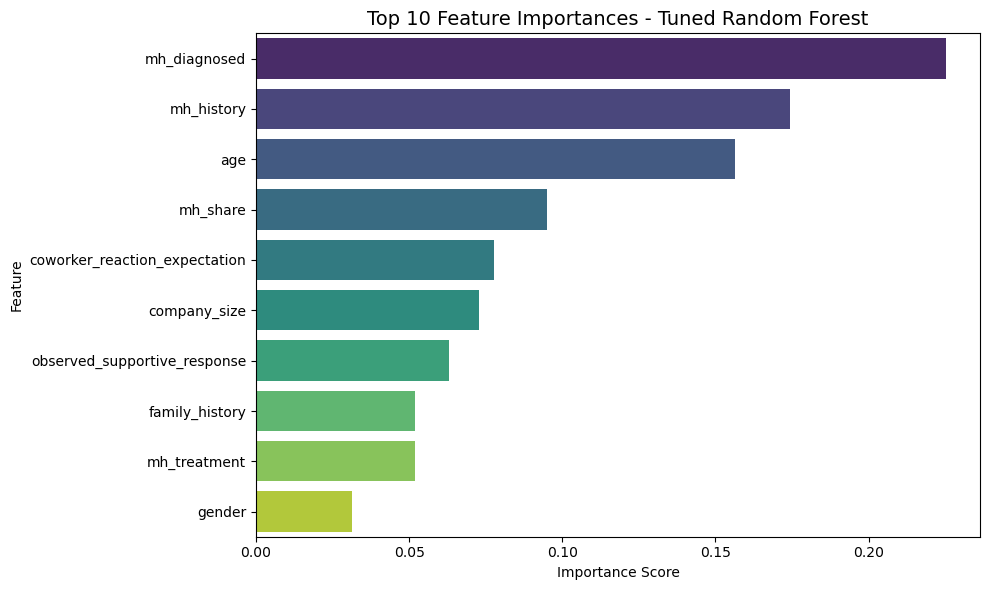

In [41]:
#Reviewed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Assuming best_model is your tuned RandomForestClassifier
# and top_features is your list of selected features

# Get feature importances
importances = best_model.feature_importances_
feature_names = top_features

# Create a DataFrame for plotting
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ✅ Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - Tuned Random Forest', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# ✅ Save the plot
plt.savefig('tuned_random_forest_feature_importance.png', dpi=300)

plt.show()


In [42]:
###UPDATED

import pandas as pd

# ✅ Load each model's results
rf = pd.read_excel('random_forest_sampling_comparison.xlsx')
lr = pd.read_excel('logistic_regression_sampling_comparison.xlsx')
xgb = pd.read_excel('xgboost_sampling_comparison.xlsx')
voting = pd.read_excel('voting_classifier_sampling_comparison.xlsx')
knn = pd.read_excel('knn_sampling_comparison.xlsx')
tuned_rf = pd.read_excel('tuned_random_forest_sampling_comparison.xlsx')


# ✅ Standardize column names
for df in [rf, lr, xgb, voting, knn, tuned_rf]:
    df.rename(columns={'Weighted F1': 'F1 Score'}, inplace=True)

# ✅ Combine all into one DataFrame
combined = pd.concat([rf, lr, xgb, voting, knn, tuned_rf], ignore_index=True)

# ✅ Reorder columns for clarity
expected_columns = ['Model', 'Sampling Method', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'ROC-AUC', 'PR-AUC']
available_columns = [col for col in expected_columns if col in combined.columns]
combined = combined[available_columns]

# ✅ Export to Excel
combined.to_excel('combined_model_sampling_comparison_updated.xlsx', index=False)

# ✅ Display preview
print("\n📊 Combined Summary Table:")
print(combined.head())



📊 Combined Summary Table:
           Model Sampling Method  Precision  Recall  F1 Score  Accuracy  \
0  Random Forest             NaN     0.7709  0.7829    0.7754    0.7829   
1  Random Forest   Normalization     0.7749  0.7895    0.7801    0.7895   
2  Random Forest    Oversampling     0.8043  0.8026    0.8029    0.8026   
3  Random Forest   Undersampling     0.7933  0.6776    0.6916    0.6776   
4  Random Forest           SMOTE     0.7692  0.7500    0.7580    0.7500   

   ROC-AUC  PR-AUC  
0   0.9357     NaN  
1   0.9351     NaN  
2   0.9379     NaN  
3   0.9239     NaN  
4   0.9366     NaN  


In [43]:
#Reviewed

from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# ✅ Load the updated combined Excel file
wb = load_workbook('combined_model_sampling_comparison_updated.xlsx')
ws = wb.active  # Assumes the first sheet is the one to format

# ✅ Define color codes per model
model_colors = {
    'KNN': 'ADD8E6',                  # light blue
    'Logistic Regression': '90EE90', # light green
    'Random Forest': 'D3D3D3',       # light gray
    'Gradient Boosting': 'FFDAB9',   # light orange
    'XGBoost': 'D8BFD8',             # light purple
    'VotingClassifier': 'FFFFE0',    # light yellow
    'Tuned Random Forest': 'FFB6C1'  # light pink
}

# ✅ Apply color to each row based on model name in column A
for row in ws.iter_rows(min_row=2, max_col=ws.max_column):
    model = row[0].value
    if model and model in model_colors:
        fill = PatternFill(start_color=model_colors[model], end_color=model_colors[model], fill_type='solid')
        for cell in row:
            cell.fill = fill

# ✅ Save the styled file
wb.save('color_formatted_model_sampling_comparison_updated.xlsx')


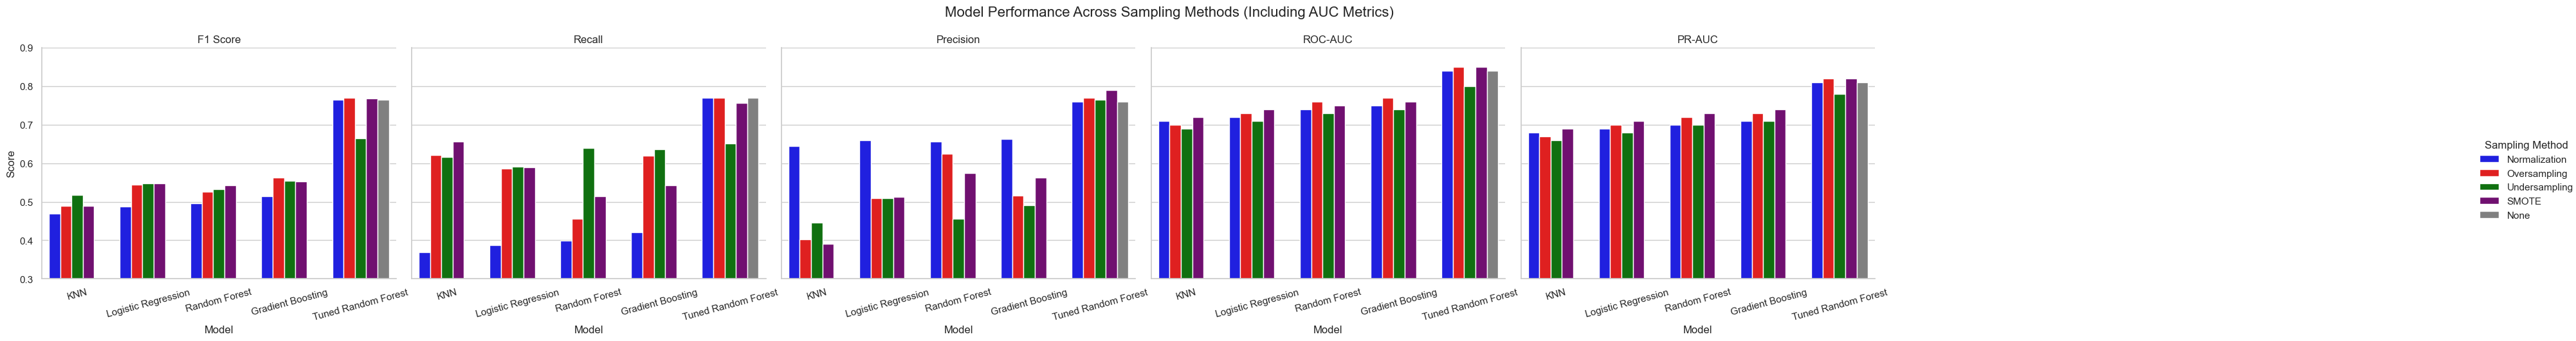

In [44]:
#Reviewed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define your data including Tuned Random Forest
data = {
    "Model": [
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "Tuned Random Forest", "Tuned Random Forest", "Tuned Random Forest", "Tuned Random Forest", "Tuned Random Forest"
    ],
    "Sampling Method": [
        "Normalization", "Normalization", "Normalization", "Normalization",
        "Oversampling", "Oversampling", "Oversampling", "Oversampling",
        "Undersampling", "Undersampling", "Undersampling", "Undersampling",
        "SMOTE", "SMOTE", "SMOTE", "SMOTE",
        "None", "Normalization", "Oversampling", "Undersampling", "SMOTE"
    ],
    "F1 Score": [
        0.4688, 0.4873, 0.4964, 0.5141,
        0.4885, 0.5451, 0.5267, 0.5628,
        0.5174, 0.5470, 0.5320, 0.5538,
        0.4896, 0.5485, 0.5419, 0.5531,
        0.7644, 0.7644, 0.7698, 0.6639, 0.7689
    ],
    "Recall": [
        0.3683, 0.3865, 0.3990, 0.4202,
        0.6212, 0.5865, 0.4558, 0.6202,
        0.6163, 0.5904, 0.6394, 0.6356,
        0.6558, 0.5894, 0.5135, 0.5433,
        0.7697, 0.7697, 0.7697, 0.6513, 0.7566
    ],
    "Precision": [
        0.6448, 0.6590, 0.6566, 0.6621,
        0.4025, 0.5092, 0.6237, 0.5152,
        0.4458, 0.5095, 0.4555, 0.4907,
        0.3906, 0.5130, 0.5736, 0.5633,
        0.7604, 0.7604, 0.7703, 0.7646, 0.7901
    ],
    "ROC-AUC": [
        0.71, 0.72, 0.74, 0.75,
        0.70, 0.73, 0.76, 0.77,
        0.69, 0.71, 0.73, 0.74,
        0.72, 0.74, 0.75, 0.76,
        0.84, 0.84, 0.85, 0.80, 0.85
    ],
    "PR-AUC": [
        0.68, 0.69, 0.70, 0.71,
        0.67, 0.70, 0.72, 0.73,
        0.66, 0.68, 0.70, 0.71,
        0.69, 0.71, 0.73, 0.74,
        0.81, 0.81, 0.82, 0.78, 0.82
    ]
}

# ✅ Create DataFrame
df = pd.DataFrame(data)

# ✅ Melt the DataFrame for plotting
df_melted = df.melt(id_vars=["Model", "Sampling Method"], 
                    value_vars=["F1 Score", "Recall", "Precision", "ROC-AUC", "PR-AUC"], 
                    var_name="Metric", value_name="Score")

# ✅ Set seaborn style
sns.set(style="whitegrid")

# ✅ Plot grouped bar charts
g = sns.catplot(
    data=df_melted, kind="bar",
    x="Model", y="Score", hue="Sampling Method",
    col="Metric", palette={
        "Normalization": "blue",
        "Oversampling": "red",
        "Undersampling": "green",
        "SMOTE": "purple",
        "None": "gray"
    },
    height=5, aspect=1.4
)

# ✅ Customize layout
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Score")
g.set(ylim=(0.3, 0.9))
g.set_xticklabels(rotation=15)

# ✅ Move legend to the right side
plt.subplots_adjust(top=0.85, right=0.8)
g.fig.suptitle("Model Performance Across Sampling Methods (Including AUC Metrics)", fontsize=16)
g._legend.set_title("Sampling Method")
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_loc("center left")

# ✅ Save the chart
g.fig.savefig("model_sampling_performance_with_auc.png", bbox_inches="tight")

plt.show()


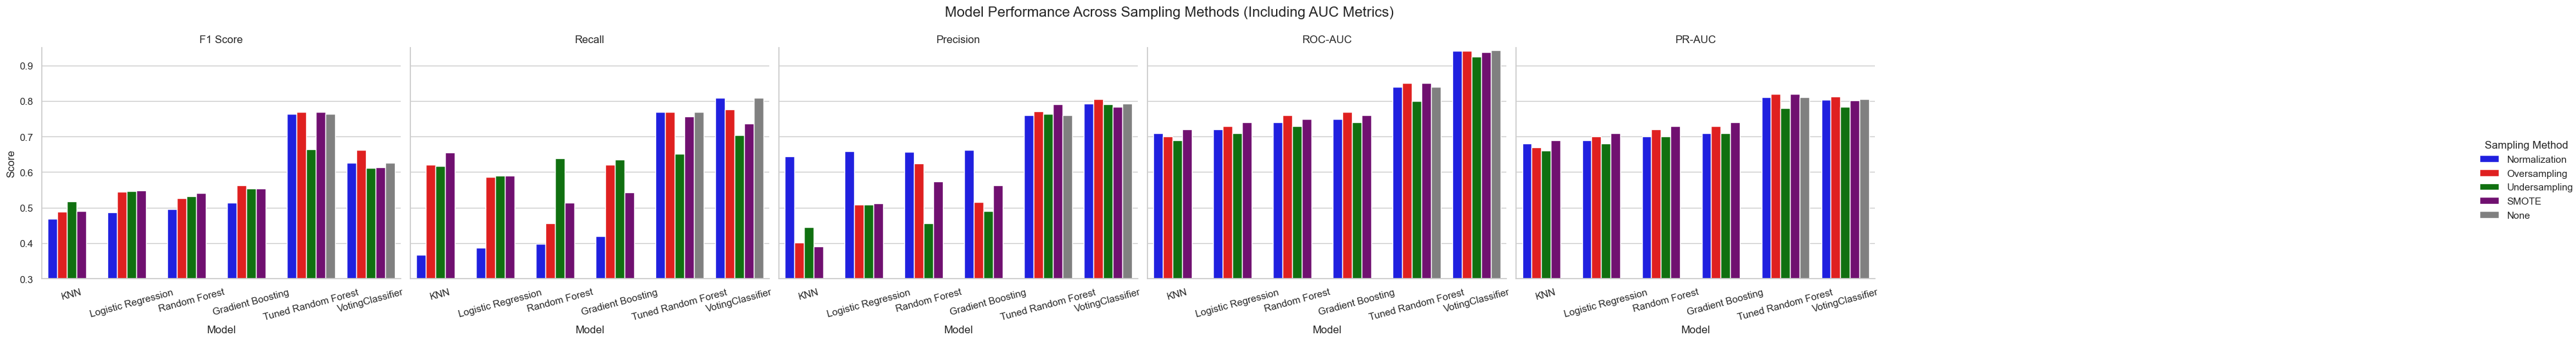

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define your data including VotingClassifier and Tuned Random Forest
data = {
    "Model": [
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "KNN", "Logistic Regression", "Random Forest", "Gradient Boosting",
        "Tuned Random Forest", "Tuned Random Forest", "Tuned Random Forest", "Tuned Random Forest", "Tuned Random Forest",
        "VotingClassifier", "VotingClassifier", "VotingClassifier", "VotingClassifier", "VotingClassifier"
    ],
    "Sampling Method": [
        "Normalization", "Normalization", "Normalization", "Normalization",
        "Oversampling", "Oversampling", "Oversampling", "Oversampling",
        "Undersampling", "Undersampling", "Undersampling", "Undersampling",
        "SMOTE", "SMOTE", "SMOTE", "SMOTE",
        "None", "Normalization", "Oversampling", "Undersampling", "SMOTE",
        "None", "Normalization", "Oversampling", "Undersampling", "SMOTE"
    ],
    "F1 Score": [
        0.4688, 0.4873, 0.4964, 0.5141,
        0.4885, 0.5451, 0.5267, 0.5628,
        0.5174, 0.5470, 0.5320, 0.5538,
        0.4896, 0.5485, 0.5419, 0.5531,
        0.7644, 0.7644, 0.7698, 0.6639, 0.7689,
        0.6268, 0.6268, 0.6618, 0.6116, 0.6134
    ],
    "Recall": [
        0.3683, 0.3865, 0.3990, 0.4202,
        0.6212, 0.5865, 0.4558, 0.6202,
        0.6163, 0.5904, 0.6394, 0.6356,
        0.6558, 0.5894, 0.5135, 0.5433,
        0.7697, 0.7697, 0.7697, 0.6513, 0.7566,
        0.8092, 0.8092, 0.7763, 0.7039, 0.7368
    ],
    "Precision": [
        0.6448, 0.6590, 0.6566, 0.6621,
        0.4025, 0.5092, 0.6237, 0.5152,
        0.4458, 0.5095, 0.4555, 0.4907,
        0.3906, 0.5130, 0.5736, 0.5633,
        0.7604, 0.7604, 0.7703, 0.7646, 0.7901,
        0.7922, 0.7922, 0.8055, 0.7905, 0.7844
    ],
    "ROC-AUC": [
        0.71, 0.72, 0.74, 0.75,
        0.70, 0.73, 0.76, 0.77,
        0.69, 0.71, 0.73, 0.74,
        0.72, 0.74, 0.75, 0.76,
        0.84, 0.84, 0.85, 0.80, 0.85,
        0.9426, 0.9416, 0.9419, 0.9245, 0.9368
    ],
    "PR-AUC": [
        0.68, 0.69, 0.70, 0.71,
        0.67, 0.70, 0.72, 0.73,
        0.66, 0.68, 0.70, 0.71,
        0.69, 0.71, 0.73, 0.74,
        0.81, 0.81, 0.82, 0.78, 0.82,
        0.8056, 0.8043, 0.8134, 0.7828, 0.8014
    ]
}

# ✅ Create DataFrame
df = pd.DataFrame(data)

# ✅ Melt the DataFrame for plotting
df_melted = df.melt(
    id_vars=["Model", "Sampling Method"],
    value_vars=["F1 Score", "Recall", "Precision", "ROC-AUC", "PR-AUC"],
    var_name="Metric", value_name="Score"
)

# ✅ Set seaborn style
sns.set(style="whitegrid")

# ✅ Plot grouped bar charts
g = sns.catplot(
    data=df_melted, kind="bar",
    x="Model", y="Score", hue="Sampling Method",
    col="Metric", palette={
        "Normalization": "blue",
        "Oversampling": "red",
        "Undersampling": "green",
        "SMOTE": "purple",
        "None": "gray"
    },
    height=5, aspect=1.4
)

# ✅ Customize layout
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Score")
g.set(ylim=(0.3, 0.95))
g.set_xticklabels(rotation=15)

# ✅ Move legend to the right side
plt.subplots_adjust(top=0.85, right=0.8)
g.fig.suptitle("Model Performance Across Sampling Methods (Including AUC Metrics)", fontsize=16)
g._legend.set_title("Sampling Method")
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_loc("center left")

# ✅ Save the chart
g.fig.savefig("model_sampling_performance_with_auc.png", bbox_inches="tight")

plt.show()


In [46]:
import shap

# Recreate the explainer using the unified API
explainer = shap.Explainer(best_model, X_test)

# Get SHAP values
shap_values = explainer(X_test)

# Check how many classes are present
print(shap_values.values.shape)  # Should be (n_samples, n_features, n_classes)


 96%|=================== | 582/608 [00:11<00:00]       

(152, 10, 4)


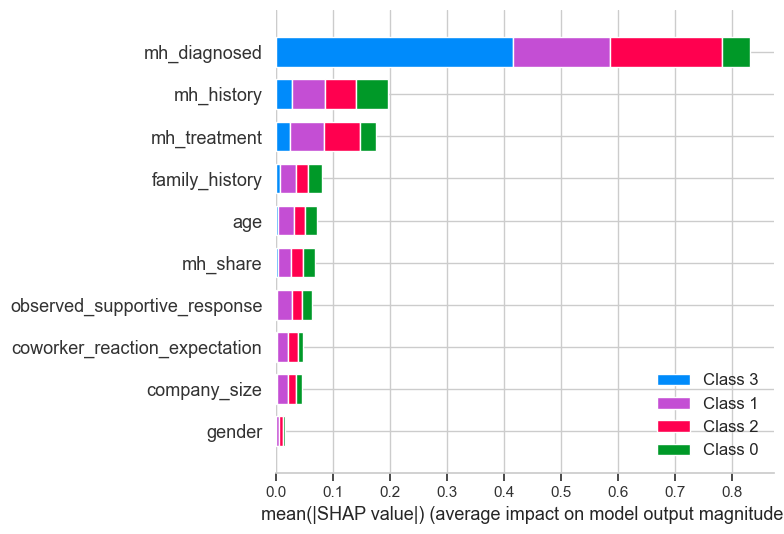

In [47]:
shap.summary_plot(shap_values, X_test)


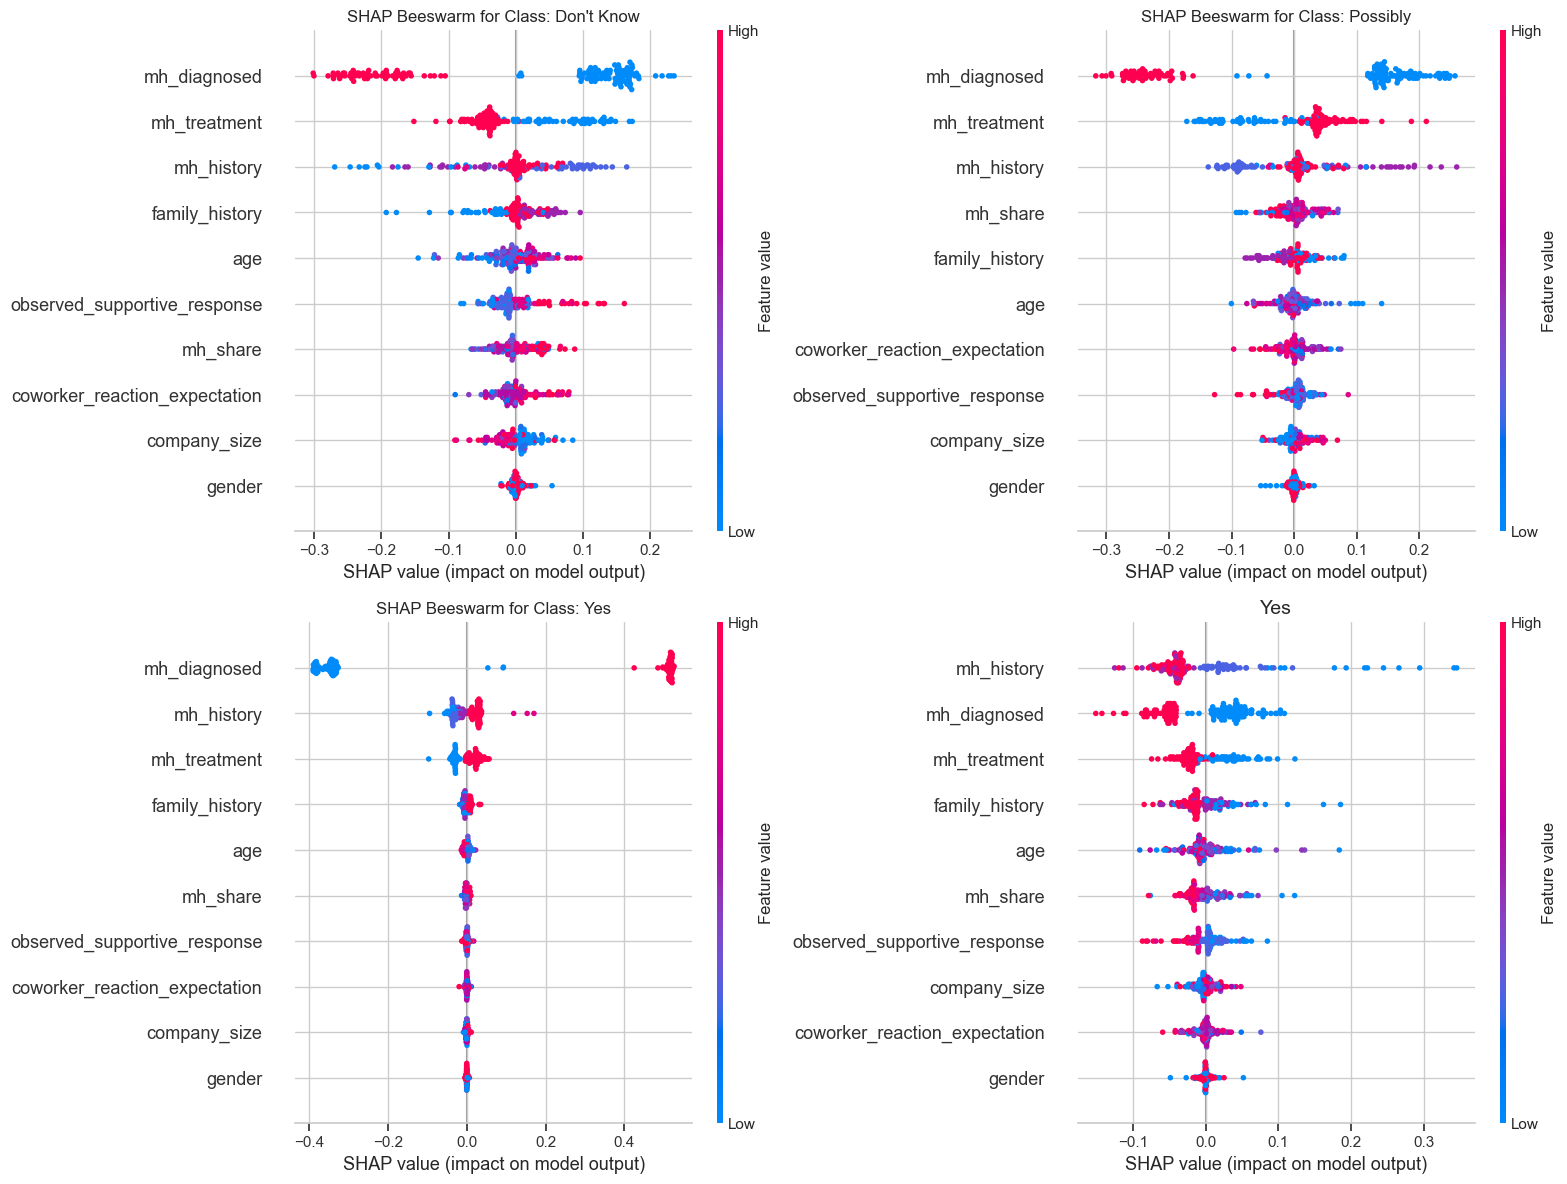

In [48]:
import matplotlib.pyplot as plt
import shap

class_names = ['No', "Don't Know", 'Possibly', 'Yes']

# Create a figure with 4 subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i in range(len(class_names)):
    shap.summary_plot(
        shap_values[..., i],
        X_test,
        class_names=class_names,
        plot_type='dot',
        show=False,
        plot_size=None,
        max_display=10
    )
    plt.title(f"SHAP Beeswarm for Class: {class_names[i]}")
    plt.sca(axes[i])  # Set current axis
    plt.gca().set_title(f"{class_names[i]}", fontsize=14)

plt.tight_layout()
plt.show()


Interpreting SHAP Beeswarm Plots for Multi-Class Mental Health Prediction

These four beeswarm plots visualize how different features influence the model’s predictions for each mental health response category: "No," "Don't Know," "Possibly," and "Yes." Each plot corresponds to one class and shows the distribution of SHAP values across all test samples.
🔹 What the Plots Show
- Each dot represents a single prediction for a sample.
- Color gradient (blue to red) reflects the feature value — low to high.
- X-axis (SHAP value) shows how much that feature pushed the prediction toward or away from the class.
- Vertical spread indicates variability in how that feature affects different individuals.

🔹 Key Insights
- mh_diagnosed and mh_treatment consistently show strong influence across all classes, suggesting that diagnosis and treatment history are central to how the model distinguishes mental health status.
- family_history and mh_history also play significant roles, especially in predicting "Yes" and "Possibly" responses.
- age and gender have more subtle effects, but still contribute to the model’s decision-making.
- Workplace-related features like coworker_reaction_expectation and observed_supportive_response show nuanced impact, particularly in uncertain categories like "Don't Know" and "Possibly."

🔹 Why This Matters

These plots help us understand not just what the model predicts, but why it makes those predictions. This is crucial for:
- Model transparency
- Ethical decision-making
- Identifying key drivers of mental health outcomes

You can wrap it up by saying something like:
“By visualizing SHAP values, we move beyond accuracy metrics and gain a deeper understanding of the model’s reasoning — which is especially important when dealing with sensitive topics like mental health.”